In [1]:
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
%run jswlab-projects/05.RicinLibraryAnalysis/analyzeCrispricin.py
%run jswlab-projects/10.Doubles_processing/GImap_analysis.py

# Loading data

In [8]:
doublesTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_doublestable.txt',sep='\t', index_col=0)
summedCountsTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_summed_counts.txt',sep='\t', index_col=0, header=range(3))

filenameRoot = 'Doubles_Libraries/CRISPRa_final_analysis/filter_15/CRISPRa_K562_'

log2es_rep1 = pd.read_csv(filenameRoot + 'replicate1_allphenotypes.txt',sep='\t', index_col=0, header=None).iloc[:,0]
log2es_rep2 = pd.read_csv(filenameRoot + 'replicate2_allphenotypes.txt',sep='\t', index_col=0, header=None).iloc[:,0]

phenotypeMatrix = pd.read_csv(filenameRoot + 'replicateAverage_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_abba = pd.read_csv(filenameRoot + 'replicateAverage_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes = pd.read_csv(filenameRoot + 'replicateAverage_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_abba = pd.read_csv(filenameRoot + 'replicateAverage_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)
singlesTable = pd.read_csv(filenameRoot + 'sgRNA_to_gene.txt',sep='\t', index_col=0)

phenotypeMatrix_rep1 = pd.read_csv(filenameRoot + 'replicate1_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_rep1_abba = pd.read_csv(filenameRoot + 'replicate1_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes_rep1 = pd.read_csv(filenameRoot + 'replicate1_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_rep1_abba = pd.read_csv(filenameRoot + 'replicate1_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)

phenotypeMatrix_rep2 = pd.read_csv(filenameRoot + 'replicate2_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_rep2_abba = pd.read_csv(filenameRoot + 'replicate2_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes_rep2 = pd.read_csv(filenameRoot + 'replicate2_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_rep2_abba = pd.read_csv(filenameRoot + 'replicate2_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)

emap_sgRNA = pd.read_csv(filenameRoot + 'emap_sgRNA_nonegs.txt',sep='\t', index_col=0)
emap_sgRNA_wnegs = pd.read_csv(filenameRoot + 'emap_sgRNA_wnegs.txt',sep='\t', index_col=0)

emap_gene = pd.read_csv(filenameRoot + 'emap_gene.txt',sep='\t', index_col=0)
emap_gene.iloc[:5,:5]

AHR    ARID1A    ARRDC3      ATL1      BAK1
AHR     3.251447 -1.764937  0.750670 -0.237766 -0.470196
ARID1A -1.764937  5.858141  0.566831 -1.053317 -1.203479
ARRDC3  0.750670  0.566831  0.702131  0.878148  2.813867
ATL1   -0.237766 -1.053317  0.878148  5.204498  1.067236
BAK1   -0.470196 -1.203479  2.813867  1.067236  2.125301

In [3]:
## Growth values
growthValues = {
'CRISPRi K562 Rep1': 6.91,
'CRISPRi K562 Rep2': 7.61,
'CRISPRi Jurkat Rep1': 6.151474054,
'CRISPRi Jurkat Rep2': 6.440885887,
'CRISPRa Rep1': 8.079146849,
'CRISPRa Rep2': 8.322110808}

In [9]:
summedCountsTable.head()

barcode                      \
                                                      cyc           t0          
                                                     rep1  rep2   rep1   rep2   
combined name                                                                   
AHR_-_17338168.23-P1P2++AHR_-_17338168.23-P1P2      103.0  89.0  287.0  429.0   
AHR_-_17338168.23-P1P2++AHR_-_17338164.23-P1P2       67.0  89.0  360.0  440.0   
AHR_-_17338168.23-P1P2++ARID1A_+_27022167.23-P1P2    44.0  63.0  457.0  498.0   
AHR_-_17338168.23-P1P2++ARID1A_-_27022243.23-P1P2    68.0  53.0  450.0  462.0   
AHR_-_17338168.23-P1P2++ARRDC3_-_90679309.23-P1P2    59.0  68.0  372.0  438.0   

                                                   sgRNA                       \
                                                     cyc            t0          
                                                    rep1   rep2   rep1   rep2   
combined name                                                                   
AHR_-_17338168.23-P1P2++AHR_-_17338168.23-P1P2     120.0   86.0  354.0  473.0   
AHR_-_17338168.23-P1P2++AHR_-_17338164.23-P1P2      89.0  106.0  494.0  638.0   
AHR_-_17338168.23-P1P2++ARID1A_+_27022167.23-P1P2   32.0   45.0  577.0  649.0   
AHR_-_17338168.23-P1P2++ARID1A_-_27022243.23-P1P2   28.0   37.0  641.0  588.0   
AHR_-_17338168.23-P1P2++ARRDC3_-_90679309.23-P1P2   85.0   72.0  453.0  535.0   

                                                  tripleseq               \
                                                        cyc           t0   
                                                       rep1  rep2   rep1   
combined name                                                              
AHR_-_17338168.23-P1P2++AHR_-_17338168.23-P1P2         70.0  61.0  192.0   
AHR_-_17338168.23-P1P2++AHR_-_17338164.23-P1P2         59.0  75.0  282.0   
AHR_-_17338168.23-P1P2++ARID1A_+_27022167.23-P1P2      15.0  29.0  358.0   
AHR_-_17338168.23-P1P2++ARID1A_-_27022243.23-P1P2      22.0  30.0  337.0   
AHR_-_17338168.23-P1P2++ARRDC3_-_90679309.23-P1P2      40.0  37.0  291.0   

                                                          
                                                          
                                                    rep2  
combined name                                             
AHR_-_17338168.23-P1P2++AHR_-_17338168.23-P1P2     283.0  
AHR_-_17338168.23-P1P2++AHR_-_17338164.23-P1P2     369.0  
AHR_-_17338168.23-P1P2++ARID1A_+_27022167.23-P1P2  395.0  
AHR_-_17338168.23-P1P2++ARID1A_-_27022243.23-P1P2  341.0  
AHR_-_17338168.23-P1P2++ARRDC3_-_90679309.23-P1P2  352.0

# QC plots (Figure S2)

## sgRNAs in A vs B position using barcode sequencing or full triple sequencing

In [10]:
log2es_rep1_bc = calcLog2e_cycledonly(summedCountsTable[('barcode','t0','rep1')],
                                   summedCountsTable[('barcode','cyc','rep1')],
                                   doublesTable,
                                   filterThreshold=15,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep1'])

log2es_rep2_bc = calcLog2e_cycledonly(summedCountsTable[('barcode','t0','rep2')],
                                   summedCountsTable[('barcode','cyc','rep2')],
                                   doublesTable,
                                   filterThreshold=15,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep2'])

53361 pairs of 57121 passing filter


/home/mhorlbeck/.local/lib/python2.7/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


53361 pairs of 57121 passing filter


In [11]:
sgIntersect = set(log2es_rep1_bc.index).intersection(log2es_rep1_bc.index)
print len(sgIntersect)
log2es_repave_bc = ((log2es_rep1_bc + log2es_rep1_bc) / 2).loc[sgIntersect]

53361


In [12]:
phenotypeMatrix_bc, singlesTable_bc, singlePhenotypes_bc = generatePhenotypeMatrix(log2es_repave_bc)

Doubles_Libraries/figs_crispra/png/531fig_single_phen_avsb.png


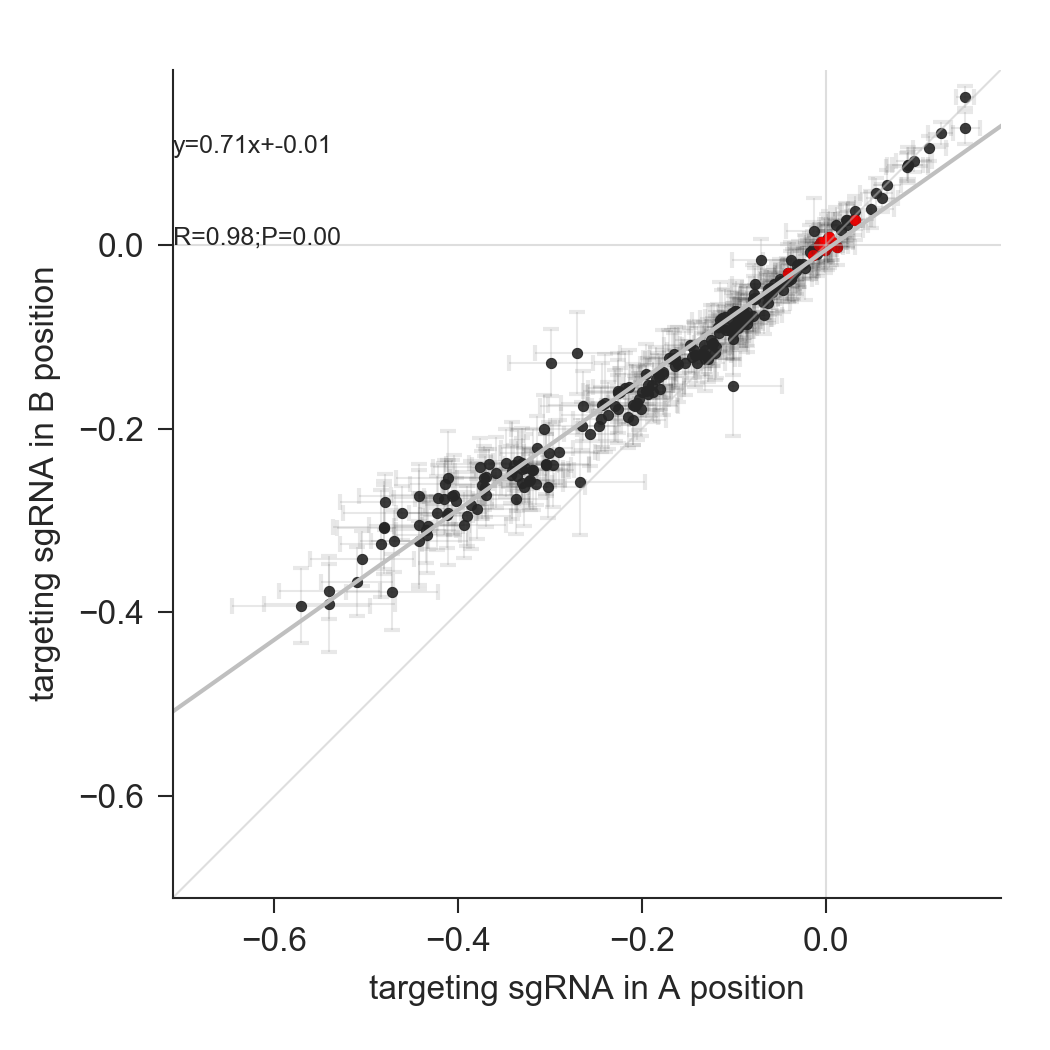

In [13]:
Image(saveFigures(plotSingleAvsB(singlePhenotypes_bc, singlesTable_bc), 'Doubles_Libraries/figs_crispra/', 'single_phen_avsb'))


Doubles_Libraries/figs_crispra/png/532fig_single_phen_avsb.png


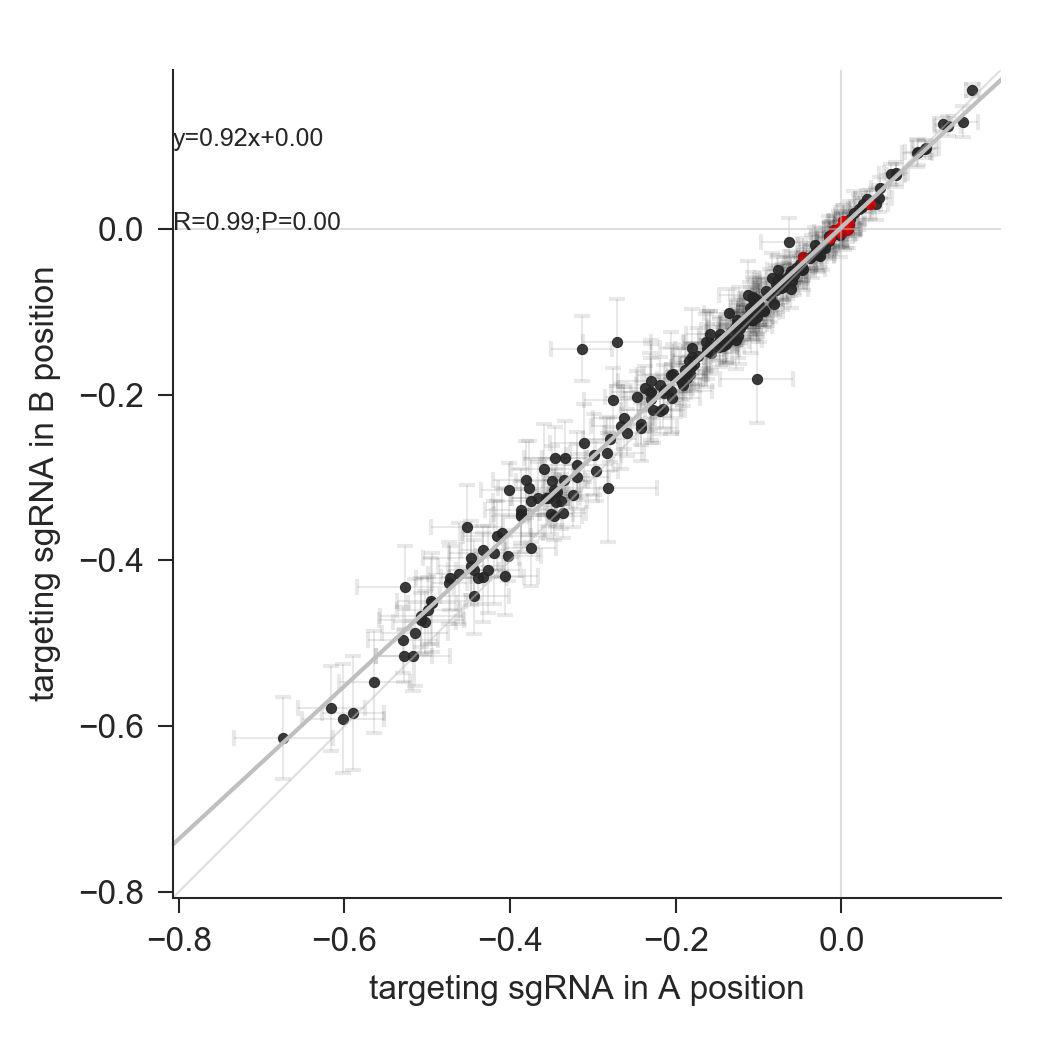

In [14]:
Image(saveFigures(plotSingleAvsB(singlePhenotypes, singlesTable), 'Doubles_Libraries/figs_crispra/', 'single_phen_avsb'))


## Replicate phenotypes

In [15]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)

Doubles_Libraries/figs_crispra/png/632fig_replicate_phenotypes.png


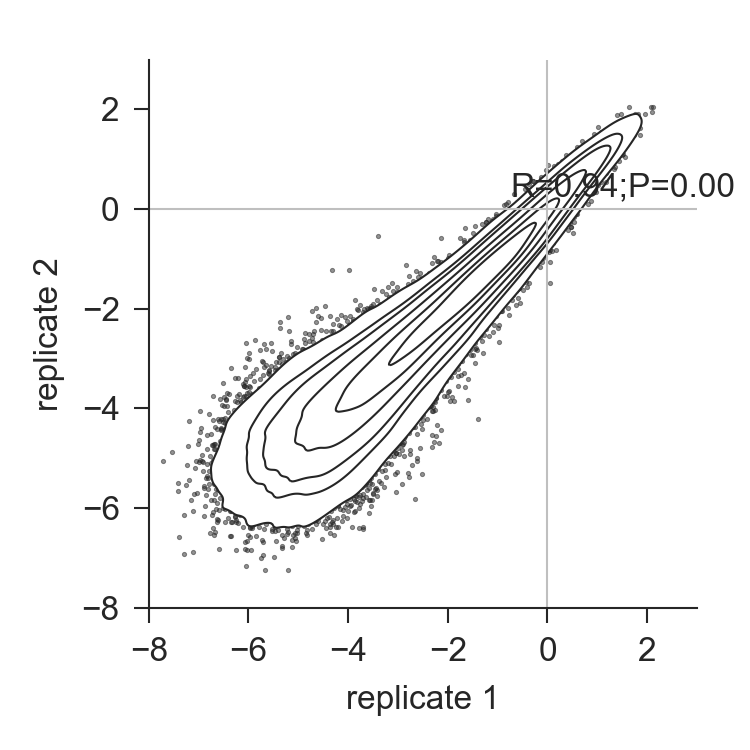

In [367]:
fig, axis = plotContourFromScatter(log2es_rep1.loc[sgIntersect]*growthValues['CRISPRa Rep1'], log2es_rep2.loc[sgIntersect]*growthValues['CRISPRa Rep2'],
                       xlabel = 'replicate 1', ylabel = 'replicate 2')

fig.set_size_inches(2.5,2.5)

axis.set_xlim((-8,3))
axis.set_xticks([-8,-6,-4,-2,0,2])
axis.set_ylim((-8,3))
axis.set_yticks([-8,-6,-4,-2,0,2])

axis.text(-0.75, 0.25, 'R=%.2f;P=%.2f' % stats.pearsonr(log2es_rep1.loc[sgIntersect], log2es_rep2.loc[sgIntersect]), fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_phenotypes'))

Doubles_Libraries/figs_crispra/png/536fig_replicate_phenotypes.png


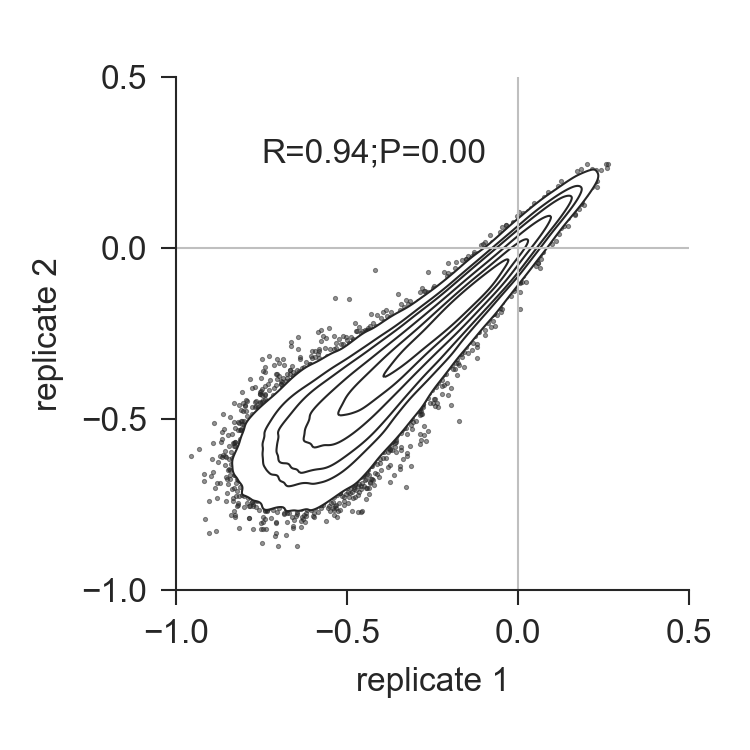

In [19]:
fig, axis = plotContourFromScatter(log2es_rep1.loc[sgIntersect], log2es_rep2.loc[sgIntersect],
                       xlabel = 'replicate 1', ylabel = 'replicate 2')

fig.set_size_inches(2.5,2.5)

axis.set_xlim((-1,.5))
axis.set_xticks([-1,-0.5,0,0.5])
axis.set_ylim((-1,.5))
axis.set_yticks([-1,-0.5,0,0.5])

axis.text(-0.75, 0.25, 'R=%.2f;P=%.2f' % stats.pearsonr(log2es_rep1.loc[sgIntersect], log2es_rep2.loc[sgIntersect]), fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_phenotypes'))

Doubles_Libraries/figs_crispra/png/627fig_replicate_phenotypes.png


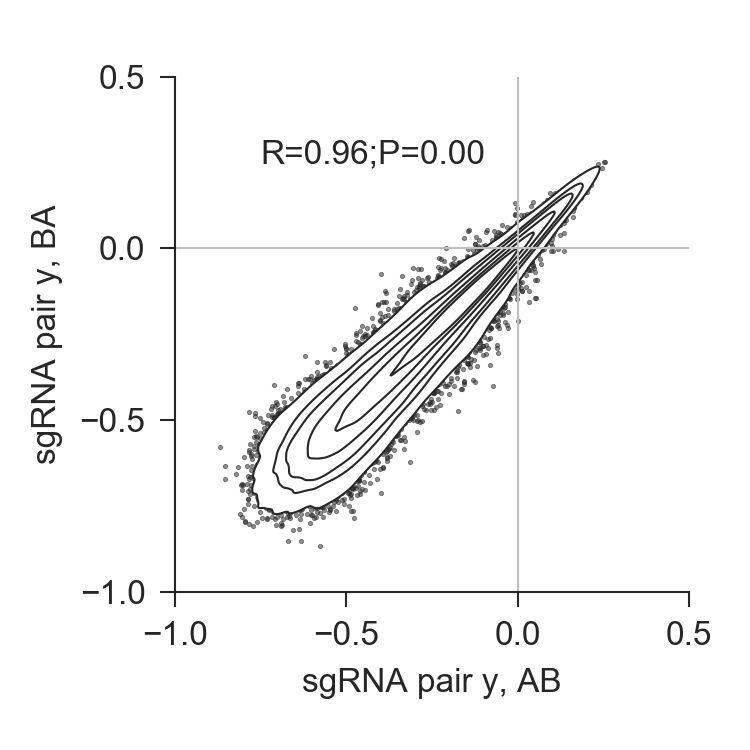

In [358]:
fig, axis = plotContourFromScatter(phenotypeMatrix.values, phenotypeMatrix.T.values,
                       xlabel = 'sgRNA pair y, AB', ylabel = 'sgRNA pair y, BA')

fig.set_size_inches(2.5,2.5)

axis.set_xlim((-1,.5))
axis.set_xticks([-1,-0.5,0,0.5])
axis.set_ylim((-1,.5))
axis.set_yticks([-1,-0.5,0,0.5])

axis.text(-0.75, 0.25, 'R=%.2f;P=%.2f' % stats.pearsonr(phenotypeMatrix.values.reshape((len(phenotypeMatrix)**2,1)), phenotypeMatrix.T.values.reshape((len(phenotypeMatrix)**2,1))), fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_phenotypes'))

## Replicate GI scores and correlations, sgRNA and gene level

In [20]:
#have to use dropna=FALSE on stack, otherwise will secretly drop nans and upper triangle will not behave as expected!!
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(dropna=False).loc[keep]

In [21]:
paired_all = brewer2mpl.get_map('paired','qualitative',10).mpl_colors

In [22]:
emap1, emap2, emap_quad_std_rep1 = calculateInteractions(phenotypeMatrix_rep1_abba, singlePhenotypes_rep1_abba, singlesTable, quadFitForceIntercept, zstandardize=True)
emap1, emap2, emap_quad_std_rep2 = calculateInteractions(phenotypeMatrix_rep2_abba, singlePhenotypes_rep2_abba, singlesTable, quadFitForceIntercept, zstandardize=True)

In [23]:
joined_reps = pd.concat((upperTriangle(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative']),
                upperTriangle(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative'])), axis=1, keys=[1,2])

joined_reps_radius = joined_reps.apply(lambda row: np.sqrt(row.iloc[0]**2 + row.iloc[1]**2), axis=1)
joined_reps_radius.head()

AHR_-_17338164.23-P1P2  AHR_-_17338168.23-P1P2       4.751035
                        ARID1A_+_27022167.23-P1P2    2.130643
                        ARID1A_-_27022243.23-P1P2    7.170833
                        ARRDC3_+_90679525.23-P1P2    0.671670
                        ARRDC3_-_90679309.23-P1P2    4.596373
dtype: float64

In [24]:
emap_gene_rep1 = generateGeneMap(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative'], singlesTable)
# emap_gene_rep2.iloc[:5,:5]
emap_gene_rep2 = generateGeneMap(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative'], singlesTable)
emap_gene_rep2.iloc[:5,:5]

AHR    ARID1A    ARRDC3      ATL1      BAK1
AHR     2.678628  0.261189  1.205497 -0.824146  0.063981
ARID1A  0.261189  4.478464  1.148919 -1.408523 -1.044517
ARRDC3  1.205497  1.148919  1.355929 -0.127254  2.107678
ATL1   -0.824146 -1.408523 -0.127254  3.961774  0.822736
BAK1    0.063981 -1.044517  2.107678  0.822736  1.758767

In [25]:
joined_reps_gene = pd.concat((upperTriangle(emap_gene_rep1),
                upperTriangle(emap_gene_rep2)), axis=1, keys=[1,2])
joined_reps_gene_radius = joined_reps_gene.apply(lambda row: np.sqrt(row.iloc[0]**2 + row.iloc[1]**2), axis=1)
joined_reps_gene_radius.head()

AHR  ARID1A     2.767891
     ARRDC3     1.209521
     ATL1       0.861137
     BAK1       0.752379
     BCL2L11    1.312179
dtype: float64

In [27]:
negRows_rep1 = emap_quad_std_rep1.loc[singlesTable['gene'] == 'negative',singlesTable['gene'] == 'negative']

randList_repave = []
rowtups = []
for i in range(len(negRows_rep1)):
    for j in range(len(negRows_rep1.T)):
        if j > i:
            for k in range(len(negRows_rep1)):
                for l in range(len(negRows_rep1.T)):
                    if l > k and k > j:
                        randList_repave.append(np.mean(np.hstack(negRows_rep1.iloc[[i,j], [k,l]].values)))
                        rowtups.append((i,j,k,l))

randNegPairs_rep1 = pd.Series(randList_repave, index=rowtups)

negRows_rep2 = emap_quad_std_rep2.loc[singlesTable['gene'] == 'negative',singlesTable['gene'] == 'negative']

randList_repave = []
rowtups = []
for i in range(len(negRows_rep2)):
    for j in range(len(negRows_rep2.T)):
        if j > i:
            for k in range(len(negRows_rep2)):
                for l in range(len(negRows_rep2.T)):
                    if l > k and k > j:
                        randList_repave.append(np.mean(np.hstack(negRows_rep2.iloc[[i,j], [k,l]].values)))
                        rowtups.append((i,j,k,l))

randNegPairs_rep2 = pd.Series(randList_repave, index=rowtups)

In [44]:
import itertools

sgRNA GI corr: (0.6552199677828905, 0.0)
sgRNA GI corr > SD thresh: (0.8556335307351141, 0.0)
sgRNA GI-corr corr: (0.8828702771698038, 0.0)
gene GI corr: (0.8031950786495727, 0.0)
gene GI corr > SD thresh: (0.9405265676404874, 3.013465635996503e-134)
gene GI-corr corr: (0.897118729844056, 0.0)
Doubles_Libraries/figs_crispra/png/540fig_replicate_GIcorr.png


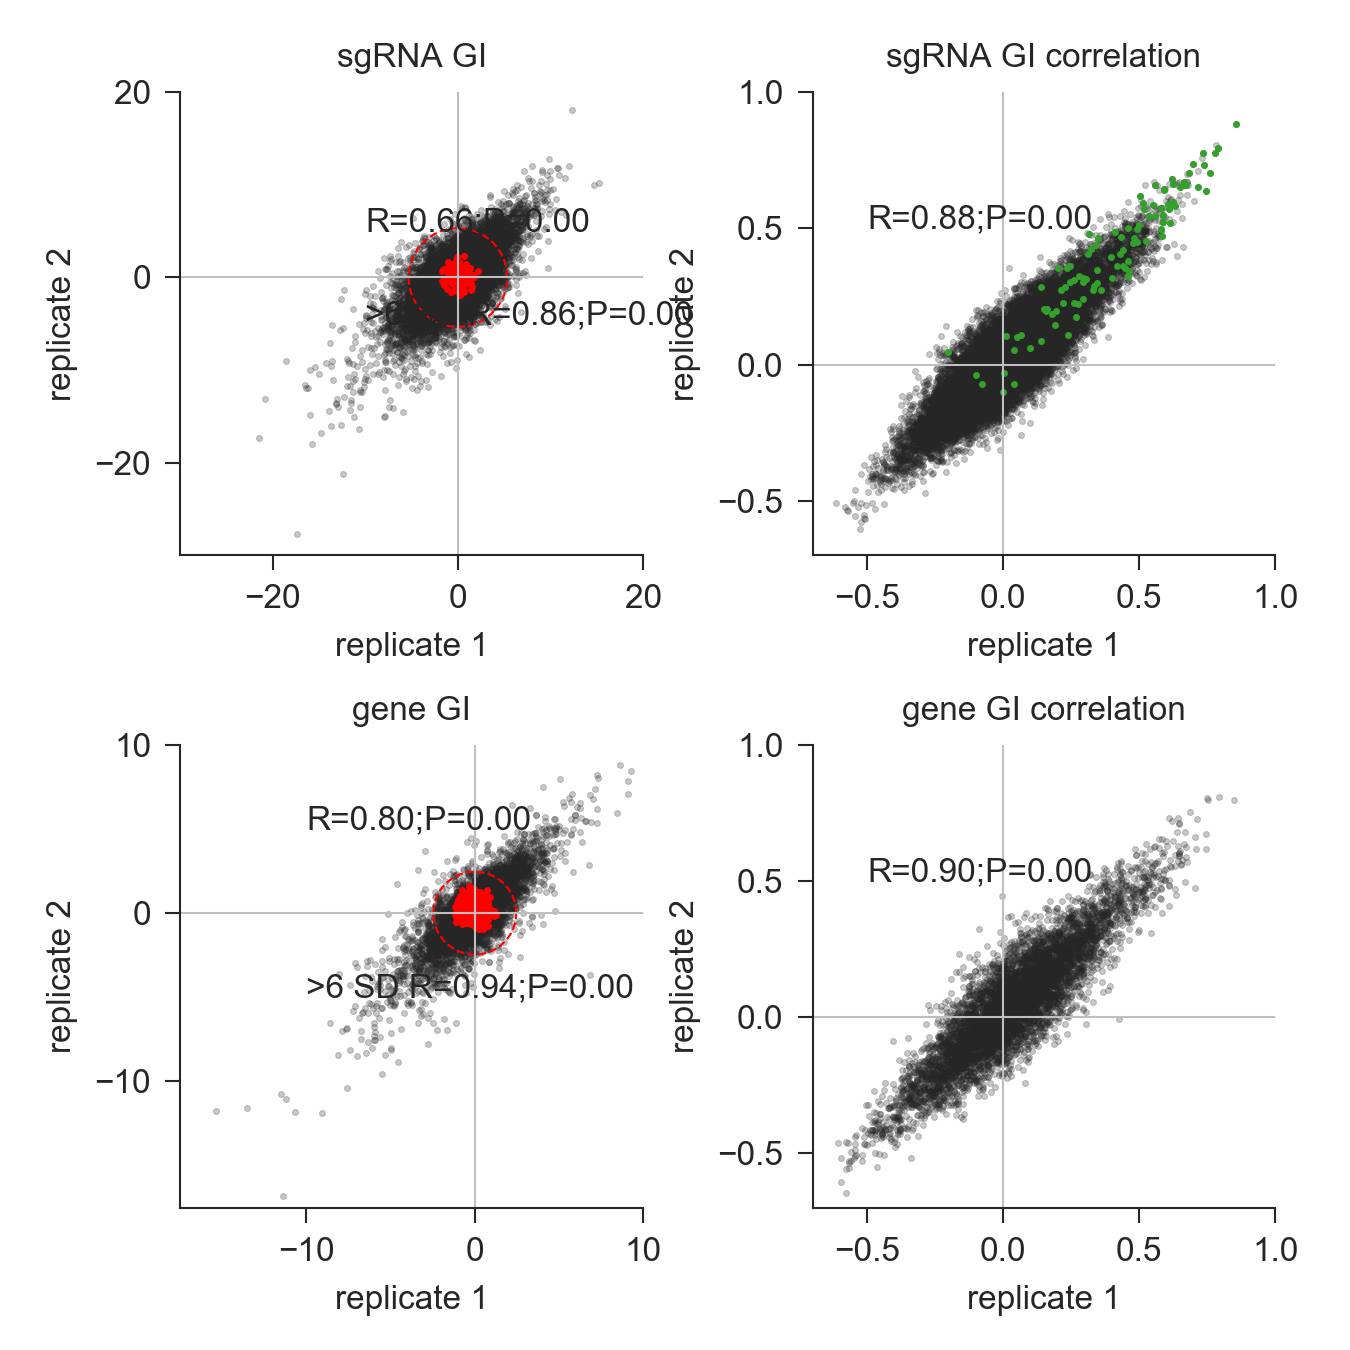

In [59]:
fig = plt.figure(figsize=(4.5, 4.5))

gs = matplotlib.gridspec.GridSpec(2,2,width_ratios=[2,2])

axis = plt.subplot(gs[0,0])
axis.set_title('sgRNA GI', fontsize=8)

axis.set_aspect('equal')

axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.scatter(upperTriangle(emap_quad_std_rep1).values,
                upperTriangle(emap_quad_std_rep2).values, s=2, c=almost_black, alpha=0.25, rasterized=True)

print 'sgRNA GI corr:', stats.pearsonr(upperTriangle(emap_quad_std_rep1).values,
                upperTriangle(emap_quad_std_rep2).values)
axis.text(-10, 5, 'R=%.2f;P=%.2f' % stats.pearsonr(upperTriangle(emap_quad_std_rep1).values,
                upperTriangle(emap_quad_std_rep2).values), fontsize=8)

axis.set_xlabel('replicate 1', fontsize=8)
axis.set_ylabel('replicate 2', fontsize=8)

axis.scatter(upperTriangle(emap_quad_std_rep1.loc[singlesTable['gene'] == 'negative', singlesTable['gene'] == 'negative']).values,
                upperTriangle(emap_quad_std_rep2.loc[singlesTable['gene'] == 'negative', singlesTable['gene'] == 'negative']).values, s=2, c='r', rasterized=True)
        
meansd_sg = np.mean((upperTriangle(emap_quad_std_rep1.loc[singlesTable['gene'] == 'negative', singlesTable['gene'] == 'negative']).std(), 
                       upperTriangle(emap_quad_std_rep2.loc[singlesTable['gene'] == 'negative', singlesTable['gene'] == 'negative']).std()))
sd_thresh=6
axis.plot(sd_thresh*meansd_sg*np.cos(np.linspace(0, np.pi*2, 50)), sd_thresh*meansd_sg*np.sin(np.linspace(0, np.pi*2, 50)), 'r--', lw=0.5)

print 'sgRNA GI corr > SD thresh:', stats.pearsonr(joined_reps.loc[joined_reps_radius >= sd_thresh*meansd_sg,1].values,
               joined_reps.loc[joined_reps_radius >= sd_thresh*meansd_sg,2].values)
axis.text(-10, -5, '>{0:d} SD R={1:.2f};P={2:.2f}'.format(sd_thresh, *stats.pearsonr(joined_reps.loc[joined_reps_radius >= sd_thresh*meansd_sg,1].values,
               joined_reps.loc[joined_reps_radius >= sd_thresh*meansd_sg,2].values)), fontsize=8)

axis.plot((0,0), (-30,20), color='#BFBFBF', lw=.5)
axis.plot((-30,20), (0,0), color='#BFBFBF', lw=.5)

axis.set_xlim((-30,20))
axis.set_ylim((-30,20))

axis.set_xticks((-20,0,20))
axis.set_yticks((-20,0,20))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)


axis = plt.subplot(gs[0,1])
axis.set_title('sgRNA GI correlation', fontsize=8)

axis.set_aspect('equal')

axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.scatter(upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values,
                upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values, s=2, c=almost_black, alpha=0.25, rasterized=True)

print 'sgRNA GI-corr corr:', stats.pearsonr(upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values,
                upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values)
axis.text(-.5, .5, 'R=%.2f;P=%.2f' % stats.pearsonr(upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values,
                upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values), fontsize=8)

axis.set_xlabel('replicate 1', fontsize=8)
axis.set_ylabel('replicate 2', fontsize=8)

corrMatrix_rep1 = calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])
sameGeneCorrs_rep1, negCorrs_rep1 = calculateIntrageneCorrelation(corrMatrix_rep1, singlePhenotypes, singlesTable.loc[singlesTable['gene'] != 'negative'])

corrMatrix_rep2 = calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])
sameGeneCorrs_rep2, negCorrs_rep2 = calculateIntrageneCorrelation(corrMatrix_rep2, singlePhenotypes, singlesTable.loc[singlesTable['gene'] != 'negative'])

axis.scatter(zip(*sameGeneCorrs_rep1)[4], zip(*sameGeneCorrs_rep2)[4], s=2, c=paired_all[3], rasterized=True)

axis.plot((0,0), (-0.7,1), color='#BFBFBF', lw=.5)
axis.plot((-0.7,1), (0,0), color='#BFBFBF', lw=.5)

axis.set_xlim((-0.7,1))
axis.set_ylim((-0.7,1))

axis.set_xticks((-0.5,0,0.5,1))
axis.set_yticks((-0.5,0,0.5,1))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)


axis = plt.subplot(gs[1,0])
axis.set_title('gene GI', fontsize=8)


axis.set_aspect('equal')

axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.scatter(upperTriangle(emap_gene_rep1).values,
                upperTriangle(emap_gene_rep2).values, s=2, c=almost_black, alpha=0.25)

print 'gene GI corr:', stats.pearsonr(upperTriangle(emap_gene_rep1).values,
                upperTriangle(emap_gene_rep2).values)
axis.text(-10, 5, 'R=%.2f;P=%.2f' % stats.pearsonr(upperTriangle(emap_gene_rep1).values,
                upperTriangle(emap_gene_rep2).values), fontsize=8)

axis.set_xlabel('replicate 1', fontsize=8)
axis.set_ylabel('replicate 2', fontsize=8)

axis.scatter(randNegPairs_rep1, randNegPairs_rep2, s=2, c='r', rasterized=True)
        
meansd_gene = np.mean((randNegPairs_rep1.std(), randNegPairs_rep2.std()))
sd_thresh_gene = 6
axis.plot(sd_thresh_gene*meansd_gene*np.cos(np.linspace(0, np.pi*2, 50)), sd_thresh_gene*meansd_gene*np.sin(np.linspace(0, np.pi*2, 50)), 'r--', lw=0.5)

print 'gene GI corr > SD thresh:', stats.pearsonr(joined_reps_gene.loc[joined_reps_gene_radius >= sd_thresh*meansd_sg,1].values,
               joined_reps_gene.loc[joined_reps_gene_radius >= sd_thresh*meansd_sg,2].values)
axis.text(-10, -5, '>{0:d} SD R={1:.2f};P={2:.2f}'.format(sd_thresh_gene, *stats.pearsonr(joined_reps_gene.loc[joined_reps_gene_radius >= sd_thresh*meansd_sg,1].values,
               joined_reps_gene.loc[joined_reps_gene_radius >= sd_thresh*meansd_sg,2].values)), fontsize=8)

axis.plot((0,0), (-17.5,10), color='#BFBFBF', lw=.5)
axis.plot((-17.5,10), (0,0), color='#BFBFBF', lw=.5)

axis.set_xticks((-10,0,10))
axis.set_yticks((-10,0,10))

axis.set_xlim((-17.5,10))
axis.set_ylim((-17.5,10))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)

axis = plt.subplot(gs[1,1])
axis.set_title('gene GI correlation', fontsize=8)


axis.set_aspect('equal')

axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

notNegative = emap_gene_rep1.apply(lambda row: row.name != 'negative', axis=1)
axis.scatter(upperTriangle(calculateCorrelationMatrix(emap_gene_rep1.loc[notNegative,notNegative])).values,
                upperTriangle(calculateCorrelationMatrix(emap_gene_rep2.loc[notNegative,notNegative])).values, s=2, c=almost_black, alpha=0.25, rasterized=True)

print 'gene GI-corr corr:', stats.pearsonr(upperTriangle(calculateCorrelationMatrix(emap_gene_rep1.loc[notNegative,notNegative])).values,
                upperTriangle(calculateCorrelationMatrix(emap_gene_rep2.loc[notNegative,notNegative])).values)
axis.text(-.5, .5, 'R=%.2f;P=%.2f' % stats.pearsonr(upperTriangle(calculateCorrelationMatrix(emap_gene_rep1.loc[notNegative,notNegative])).values,
                upperTriangle(calculateCorrelationMatrix(emap_gene_rep2.loc[notNegative,notNegative])).values), fontsize=8)

axis.set_xlabel('replicate 1', fontsize=8)
axis.set_ylabel('replicate 2', fontsize=8)


axis.plot((0,0), (-0.7,1), color='#BFBFBF', lw=.5)
axis.plot((-0.7,1), (0,0), color='#BFBFBF', lw=.5)

axis.set_xticks((-0.5,0,0.5,1))
axis.set_yticks((-0.5,0,0.5,1))

axis.set_xlim((-0.7,1))
axis.set_ylim((-0.7,1))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)


gs.tight_layout(fig, w_pad=0.01)

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_GIcorr'))

In [360]:
#rerun to get the intermediate emaps before sample/query averaging
emap1, emap2, emap_quad_std_repave = calculateInteractions(phenotypeMatrix_abba, singlePhenotypes_abba, singlesTable, quadFitForceIntercept, zstandardize=True)


Doubles_Libraries/figs_crispra/png/629fig_replicate_phenotypes.png


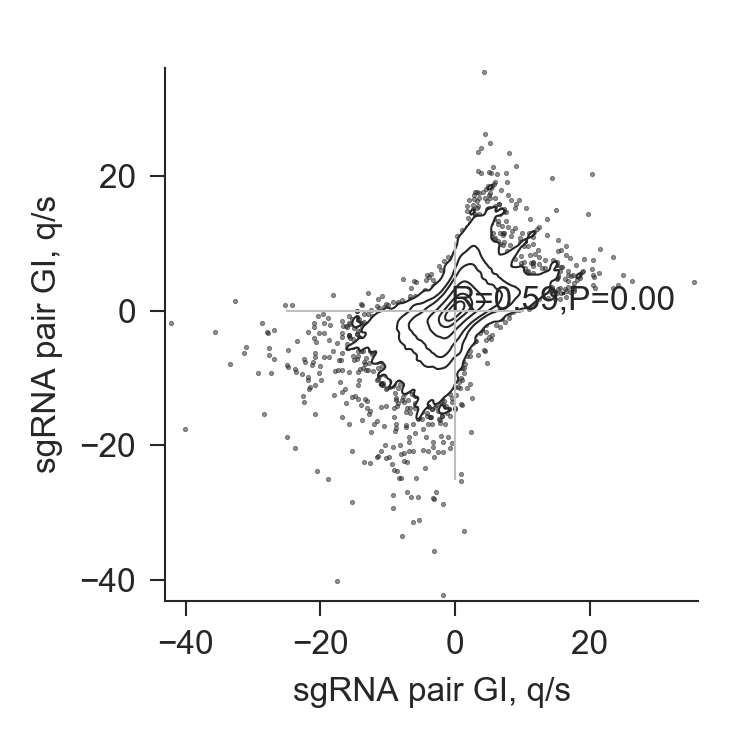

In [363]:
fig, axis = plotContourFromScatter(emap1.values, emap1.T.values,
                       xlabel = 'sgRNA pair GI, q/s', ylabel = 'sgRNA pair GI, q/s')

fig.set_size_inches(2.5,2.5)

# axis.set_xlim((-1,.5))
# axis.set_xticks([-1,-0.5,0,0.5])
# axis.set_ylim((-1,.5))
# axis.set_yticks([-1,-0.5,0,0.5])

axis.text(-0.75, 0.25, 'R=%.2f;P=%.2f' % stats.pearsonr(emap1.values.reshape((len(emap1)**2,1)), emap2.T.values.reshape((len(emap2)**2,1))), fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_phenotypes'))

## Same gene-targeting sgRNA correlations

Doubles_Libraries/figs_crispra/png/542fig_GIcorr.png


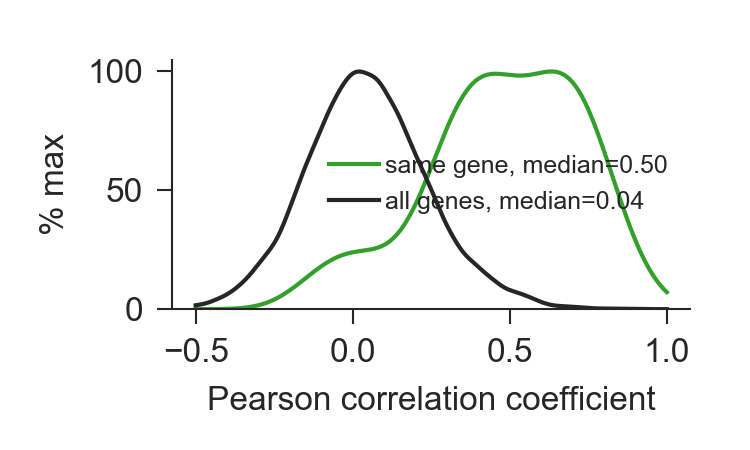

In [64]:
fig, axis = plt.subplots(figsize=(2.5,1.5))

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='8')

plotrange = np.arange(-0.5, 1.01,.01)

sameGeneCorrs, negCorrs = calculateIntrageneCorrelation(calculateCorrelationMatrix(emap_sgRNA), singlePhenotypes_abba, singlesTable.loc[singlesTable['gene'] != 'negative'])

density = stats.gaussian_kde(zip(*sameGeneCorrs)[4])(plotrange)
axis.plot(plotrange, density/max(density)*100.0, lw=1, color=paired_all[3], label='same gene, median=%.2f' % np.median(zip(*sameGeneCorrs)[4]))

density = stats.gaussian_kde(upperTriangle(calculateCorrelationMatrix(emap_sgRNA), k=1))(plotrange)
axis.plot(plotrange, density/max(density)*100.0, lw=1, color=almost_black, label='all genes, median=%.2f' % upperTriangle(calculateCorrelationMatrix(emap_sgRNA), k=1).median())


# axis.set_xlim((-.3, .75))
axis.set_ylim((0,105))

axis.set_xlabel('Pearson correlation coefficient', fontsize=8)
axis.set_ylabel('% max', fontsize=8)

axis.legend(fontsize=6)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'GIcorr'))

In [63]:
print np.median(zip(*negCorrs)[4]), np.median(zip(*sameGeneCorrs)[4])

-0.061401992550744064 0.4875377602596256


Doubles_Libraries/figs_crispra/png/543fig_intragene_corrs.png


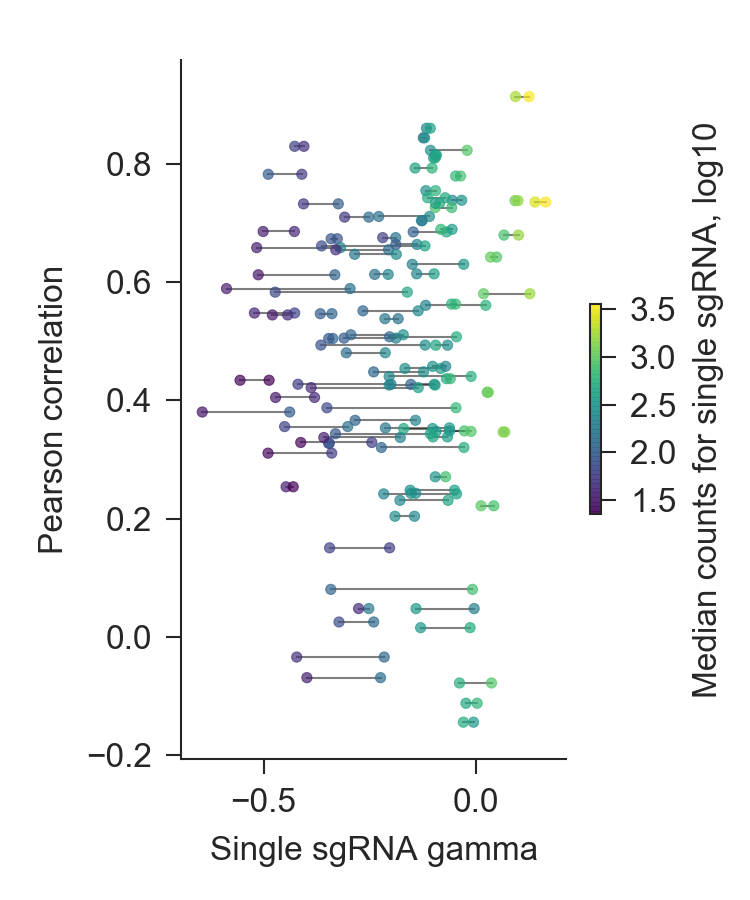

In [69]:
fig, axis = plt.subplots(figsize=(2.5,3))

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='8')

axis.plot(np.array(zip(zip(*sameGeneCorrs)[2], zip(*sameGeneCorrs)[3])).T, np.array(zip(zip(*sameGeneCorrs)[4], zip(*sameGeneCorrs)[4])).T,'k-', alpha=.5, lw=.5, zorder=0)
sgPhens = np.hstack((zip(*sameGeneCorrs)[2],zip(*sameGeneCorrs)[3]))
sgCorrs = np.hstack((zip(*sameGeneCorrs)[4],zip(*sameGeneCorrs)[4]))
sgIds = np.hstack((zip(*sameGeneCorrs)[0],zip(*sameGeneCorrs)[1]))

result = axis.scatter(sgPhens, sgCorrs, c=np.log10(summedCountsTable.groupby(doublesTable.loc[:,'name_a']).agg(np.median).loc[sgIds,('tripleseq','cyc')].mean(axis=1)+1), 
                      alpha=.7, s=6, cmap=matplotlib.cm.viridis)
cbar = fig.colorbar(result, ax=axis, shrink=.3)
cbar.ax.set_ylabel('Median counts for single sgRNA, log10', fontsize=8)
# cbar.set_clim(0,3.5)
cbar.set_ticks(np.arange(0,4,0.5))
cbar.ax.tick_params(labelsize=8)

axis.set_xlabel('Single sgRNA gamma', fontsize=8)
axis.set_ylabel('Pearson correlation', fontsize=8)

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)
plt.tight_layout()

Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/','intragene_corrs'))

# Annotating and displaying maps

In [70]:
genes_to_all_david = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181217_david.txt', sep='\t',index_col=0).fillna('')

In [71]:
genes_to_all_david.head()

Gene Name       Species  \
ID                                                                      
ARID1A            AT-rich interaction domain 1A(ARID1A)  Homo sapiens   
BAK1                     BCL2 antagonist/killer 1(BAK1)  Homo sapiens   
BCL2L11                           BCL2 like 11(BCL2L11)  Homo sapiens   
BCORL1                  BCL6 corepressor-like 1(BCORL1)  Homo sapiens   
BCR      BCR, RhoGEF and GTPase activating protein(BCR)  Homo sapiens   

                                                      BBID  \
ID                                                           
ARID1A                                                       
BAK1                                                         
BCL2L11                                                      
BCORL1                                                       
BCR      150.caspase_and_NFKB_activation,158.14-3-3_sig...   

                                                  BIOCARTA COG_ONTOLOGY  \
ID                                                                        
ARID1A   h_hSWI-SNFpathway:Chromatin Remodeling by hSWI...                
BAK1     h_mitochondriaPathway:Role of Mitochondria in ...                
BCL2L11                                                                   
BCORL1                                                                    
BCR      h_gleevecPathway:Inhibition of Cellular Prolif...                

                                          GOTERM_BP_DIRECT  \
ID                                                           
ARID1A   GO:0000122~negative regulation of transcriptio...   
BAK1     GO:0001782~B cell homeostasis,GO:0001783~B cel...   
BCL2L11  GO:0001701~in utero embryonic development,GO:0...   
BCORL1   GO:0006351~transcription, DNA-templated,GO:000...   
BCR      GO:0002692~negative regulation of cellular ext...   

                                          GOTERM_CC_DIRECT  \
ID                                                           
ARID1A   GO:0000790~nuclear chromatin,GO:0005634~nucleu...   
BAK1     GO:0005739~mitochondrion,GO:0005741~mitochondr...   
BCL2L11  GO:0005739~mitochondrion,GO:0005741~mitochondr...   
BCORL1   GO:0005654~nucleoplasm,GO:0005737~cytoplasm,GO...   
BCR      GO:0005622~intracellular,GO:0005829~cytosol,GO...   

                                          GOTERM_MF_DIRECT  \
ID                                                           
ARID1A   GO:0003677~DNA binding,GO:0003713~transcriptio...   
BAK1     GO:0005515~protein binding,GO:0031072~heat sho...   
BCL2L11  GO:0005515~protein binding,GO:0008017~microtub...   
BCORL1                                                       
BCR      GO:0004674~protein serine/threonine kinase act...   

                                                  INTERPRO  \
ID                                                           
ARID1A   IPR001606:ARID/BRIGHT DNA-binding domain,IPR01...   
BAK1     IPR002475:Bcl2-like,IPR020717:Apoptosis regula...   
BCL2L11  IPR014771:Apoptosis, Bim N-terminal,IPR015040:...   
BCORL1   IPR002110:Ankyrin repeat,IPR020683:Ankyrin rep...   
BCR      IPR000008:C2 calcium-dependent membrane target...   

                                              KEGG_PATHWAY  \
ID                                                           
ARID1A                                                       
BAK1     hsa04141:Protein processing in endoplasmic ret...   
BCL2L11  hsa04068:FoxO signaling pathway,hsa04151:PI3K-...   
BCORL1                                                       
BCR      hsa05200:Pathways in cancer,hsa05220:Chronic m...   

                                              OMIM_DISEASE  \
ID                                                           
ARID1A   614607~Mental retardation, autosomal dominant 14,   
BAK1                                                         
BCL2L11                                                      
BCORL1                                                       
BCR      608232~Leukemia, 

In [74]:
%run jswlab-projects/10.Doubles_processing/hierarchical_annotation.py

In [262]:
perturb_expression = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/expression_used_for_UMAP.csv', index_col=0)
perturb_expression.iloc[:5,:5]

FO538757.2     NOC2L      HES4     ISG15      SDF4
ISL2    -0.180155 -0.631474 -0.045635  0.298753  0.124927
PLK4    -1.060673 -0.539483  0.395548 -0.096688 -0.850817
KIF2C   -0.343670  0.383329 -1.013244 -0.030855  0.504609
RREB1   -0.177858 -0.086670  5.912836 -0.103159  0.244707
LHX1    -0.388310 -1.319906 -0.979915  0.836015  0.894939

In [266]:
perturb_map = pd.read_csv('Doubles_Libraries/perturb-seq/20181220_perturbseq_corrs.txt',sep='\t', index_col=0)
perturb_map.iloc[:5,:5]

IRF1    COL1A1   CBFA2T3      ETS2     FOXF1
IRF1     1.000000  0.017705  0.056257 -0.034391  0.063096
COL1A1   0.017705  1.000000  0.181318  0.139878  0.176682
CBFA2T3  0.056257  0.181318  1.000000  0.206793  0.258205
ETS2    -0.034391  0.139878  0.206793  1.000000  0.043527
FOXF1    0.063096  0.176682  0.258205  0.043527  1.000000

In [77]:
gene_symbol_convert = {
    'C19orf26': 'CBARP',
    'C3orf72': 'FOXL2NB',
    'KIAA1804': 'MLK4',
    'RP5-862P8.2': 'MLK4'
}

In [108]:
emap_gene.index = [gene_symbol_convert[g] if g in gene_symbol_convert else g for g in emap_gene.index]
emap_gene.columns = [gene_symbol_convert[g] if g in gene_symbol_convert else g for g in emap_gene.columns]
perturb_map.index = [gene_symbol_convert[g] if g in gene_symbol_convert else g for g in perturb_map.index]
perturb_map.columns = [gene_symbol_convert[g] if g in gene_symbol_convert else g for g in perturb_map.columns]

In [79]:
#convert continuous values to 0-1 scale
#assumes max>=center>=min but center does not have to be midpoint of min and max
def scale_to_fraction(values, min_value, center_value, max_value):
    if np.isclose((max_value - min_value) / 2.0 + min_value, 0):
        return np.maximum(0, np.minimum(1, (values-min_value)/(max_value - min_value)))
    
    else: #if color scale is not symmetrical, like -0.2->0->1.0
        if abs(max_value - center_value) > abs(center_value - min_value):
            symmetrical_min_value = center_value - abs(max_value-center_value)
            scaled_min_value = (min_value-symmetrical_min_value)/(max_value - symmetrical_min_value)
            
            return np.maximum(scaled_min_value, np.minimum(1, (values-symmetrical_min_value)/(max_value - symmetrical_min_value)))

        
        else:
            symmetrical_max_value = center_value + abs(min_value-center_value)
            scaled_max_value = (max_value-min_value)/(symmetrical_max_value - min_value)
            
            return np.maximum(0, np.minimum(scaled_max_value, (values-min_value)/(symmetrical_max_value - min_value)))


In [80]:
#'#20B6E2' -> '#F4EA18'
# 32,182,226 -> 244,234,24
# .125, .713, .886 -> .957, .918, .094
cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
blue_yellow = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)
blue_yellow.set_bad((.9, .9, .9, 1.0))
plt.register_cmap(cmap=blue_yellow)

In [81]:
red_blue = matplotlib.cm.RdBu_r
red_blue.set_bad((.9, .9, .9, 1.0))

In [82]:
#af8dc3 -> #f7f7f7 -> #7fbf7b
# 175,141,195 -> 247,247,247 -> 127,191,123
# 0.68627451, 0.55294118, 0.76470588 -> 0.96862745, 0.96862745, 0.96862745 -> 0.49803922, 0.74901961, 0.48235294
cdict = {'red':((0.0,0.68627451,0.68627451),
                (0.5,0.96862745,0.96862745),
                (1.0,0.49803922,0.49803922)),
        'green':((0.0,0.55294118,0.55294118),
                (0.5,0.96862745,0.96862745),
                (1.0,0.74901961,0.74901961)),
        'blue': ((0.0,0.76470588,0.76470588),
                (0.5,0.96862745,0.96862745),
                (1.0,0.48235294,0.48235294))}
green_purple = matplotlib.colors.LinearSegmentedColormap('GreenPurple',cdict)
green_purple.set_bad((.9, .9, .9, 1.0))
plt.register_cmap(cmap=green_purple)

In [83]:
brown_green = matplotlib.cm.BrBG
brown_green.set_bad((.9, .9, .9, 1.0))

In [84]:
emap_perturb_combined = emap_gene

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

IPR002070:Transcription factor, Brachyury (-8.734882) 
	was folded up into
GO:0060021~palate development (-8.781402)

GO:0000981~RNA polymerase II transcription factor activity, sequence-specific DNA binding (-7.905933) 
	was folded up into
IPR018122:Transcription factor, fork head, conserved site (-15.641803)



In [ ]:
shortnames = []

accepted_nodes = reduce(np.union1d, node_to_parent_table.values)
accepted_nodes = accepted_nodes[np.isfinite(accepted_nodes)]

for n, row in eligible_parent_nodes.iterrows():
    if n in accepted_nodes:
        print row['term'], row['logp']
        print 'Genes in node:', ' '.join([leaf_order.reset_index().set_index('leaf_id').loc[l,'index'] for l in range(len(emap_perturb_combined)) if n in node_to_parent_table.loc[leaf_order.reset_index().set_index('leaf_id').loc[l,'index']].values])
        print 'Genes in term:', ' '.join(leaf_order.reset_index().set_index('leaf_id').loc[david_matrix[row['term']] == 1,'index'])
        shortnames.append(raw_input())
    else:
        shortnames.append(np.nan)

#### Output/input from previous notebook

    GO:0035897~proteolysis in other organism -8.73488189205
    Genes in node: MAP2K3 MAP2K6
    Genes in term: MAP2K6 MAP2K3
    MAP2K
    IPR013638:Fork-head N-terminal -8.73488189205
    Genes in node: FOXA1 FOXA3
    Genes in term: FOXA1 FOXA3
    N-terminal Forkhead TF
    hsa04320:Dorso-ventral axis formation -8.73488189205
    Genes in node: ETS2 MAPK1
    Genes in term: MAPK1 ETS2
    ETS2/MAPK1
    IPR003598:Immunoglobulin subtype 2 -8.73488189205
    Genes in node: IGDCC3 PRTG
    Genes in term: IGDCC3 PRTG
    Ig domain containing
    IPR013078:Histidine phosphatase superfamily, clade-1 -7.63626960338
    Genes in node: UBASH3A UBASH3B
    Genes in term: BPGM UBASH3B UBASH3A
    Histidine phosphatase
    IPR016130:Protein-tyrosine phosphatase, active site -12.3367499692
    Genes in node: PTPN1 PTPN12 PTPN9
    Genes in term: PTPN1 PTPN9 PTPN12
    Tyrosine phosphatase
    IPR018122:Transcription factor, fork head, conserved site -15.6418034903
    Genes in node: FOXA1 FOXA3 FOXF1 FOXL2
    Genes in term: FOXF1 FOXA1 FOXA3 FOXL2
    Forkhead TF
    GO:0005814~centriole -8.73488189205
    Genes in node: PLK4 STIL
    Genes in term: PLK4 STIL
    Centriole
    GO:0043565~sequence-specific DNA binding -7.83399978553
    Genes in node: FOXA1 FOXA3 FOXF1 FOXL2 HOXB9
    Genes in term: FOXO4 TP73 IKZF3 TBX3 TBX2 CSRNP1 IRF1 HNF4A RHOXF2B JUN HOXB9 FOXF1 FOXA1 FOXA3 FOXL2 HOXC13 HOXA13 EGR1 ETS2 FOSB OSR2 CEBPB LHX1 ISL2 FEV
    DNA binding
    PIRSF038172:mitogen-activated protein kinase kinase kinase kinase -8.73488189205
    Genes in node: MAP4K3 MAP4K5
    Genes in term: MAP4K3 MAP4K5
    MAP4K
    IPR001781:Zinc finger, LIM-type -8.73488189205
    Genes in node: ISL2 LHX1
    Genes in term: LHX1 ISL2
    LIM-type zinc finger TF
    GO:0060021~palate development -8.78140190768
    Genes in node: CSRNP1 TBX2 TBX3
    Genes in term: TGFBR2 TBX3 TBX2 CSRNP1 SNAI1 OSR2 COL2A1
    Brachyury TF
    IPR019821:Kinesin, motor region, conserved site -8.73488189205
    Genes in node: KIF18B KIF2C
    Genes in term: KIF2C KIF18B
    Kinesin
    GO:0090200~positive regulation of release of cytochrome c from mitochondria -8.73488189205
    Genes in node: BAK1 BCL2L11
    Genes in term: BAK1 BCL2L11
    BAK/BIM
    IPR004827:Basic-leucine zipper domain -8.66172754972
    Genes in node: CEBPB CEBPE FOSB OSR2
    Genes in term: JUN FOSB CEBPB CEBPE CEBPA
    bLZ TF
    GO:0043434~response to peptide hormone -7.63626960338
    Genes in node: CDKN1B COL1A1 HNF4A
    Genes in term: COL1A1 CDKN1B
    Response to peptide hormone
    IPR003175:Cyclin-dependent kinase inhibitor -10.0341648762
    Genes in node: CDKN1A CDKN1B CDKN1C COL1A1 HNF4A
    Genes in term: CDKN1B CDKN1A CDKN1C
    CDK inhibitor
    GO:0007596~blood coagulation -8.78140190768
    Genes in node: CDKN1A CDKN1B CDKN1C COL1A1 HES7 HNF4A IRF1
    Genes in term: IRF1 HNF4A COL1A1
    Blood coagulation

In [85]:
eligible_parent_nodes['short name'] = ['MAP2K',
 'N-terminal Forkhead TF',
 np.nan,
 'ETS2/MAPK1',
 'Ig domain containing',
 np.nan,
 'Histidine phosphatase',
 'Tyrosine phosphatase',
 'Forkhead TF',
 'Centriole',
 'DNA binding',
 'MAP4K',
 'LIM-type zinc finger TF',
 'Brachyury TF',
 'Kinesin',
 'BAK/BIM',
 'bLZ TF',
 'Response to peptide hormone',
 'CDK inhibitor',
 'Blood coagulation']

In [87]:
singlePhenotypes_genemean = singlePhenotypes_abba['a.mean'].groupby(singlesTable['gene']).agg(np.mean)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


Doubles_Libraries/figs_crispra/png/544fig_emap.png


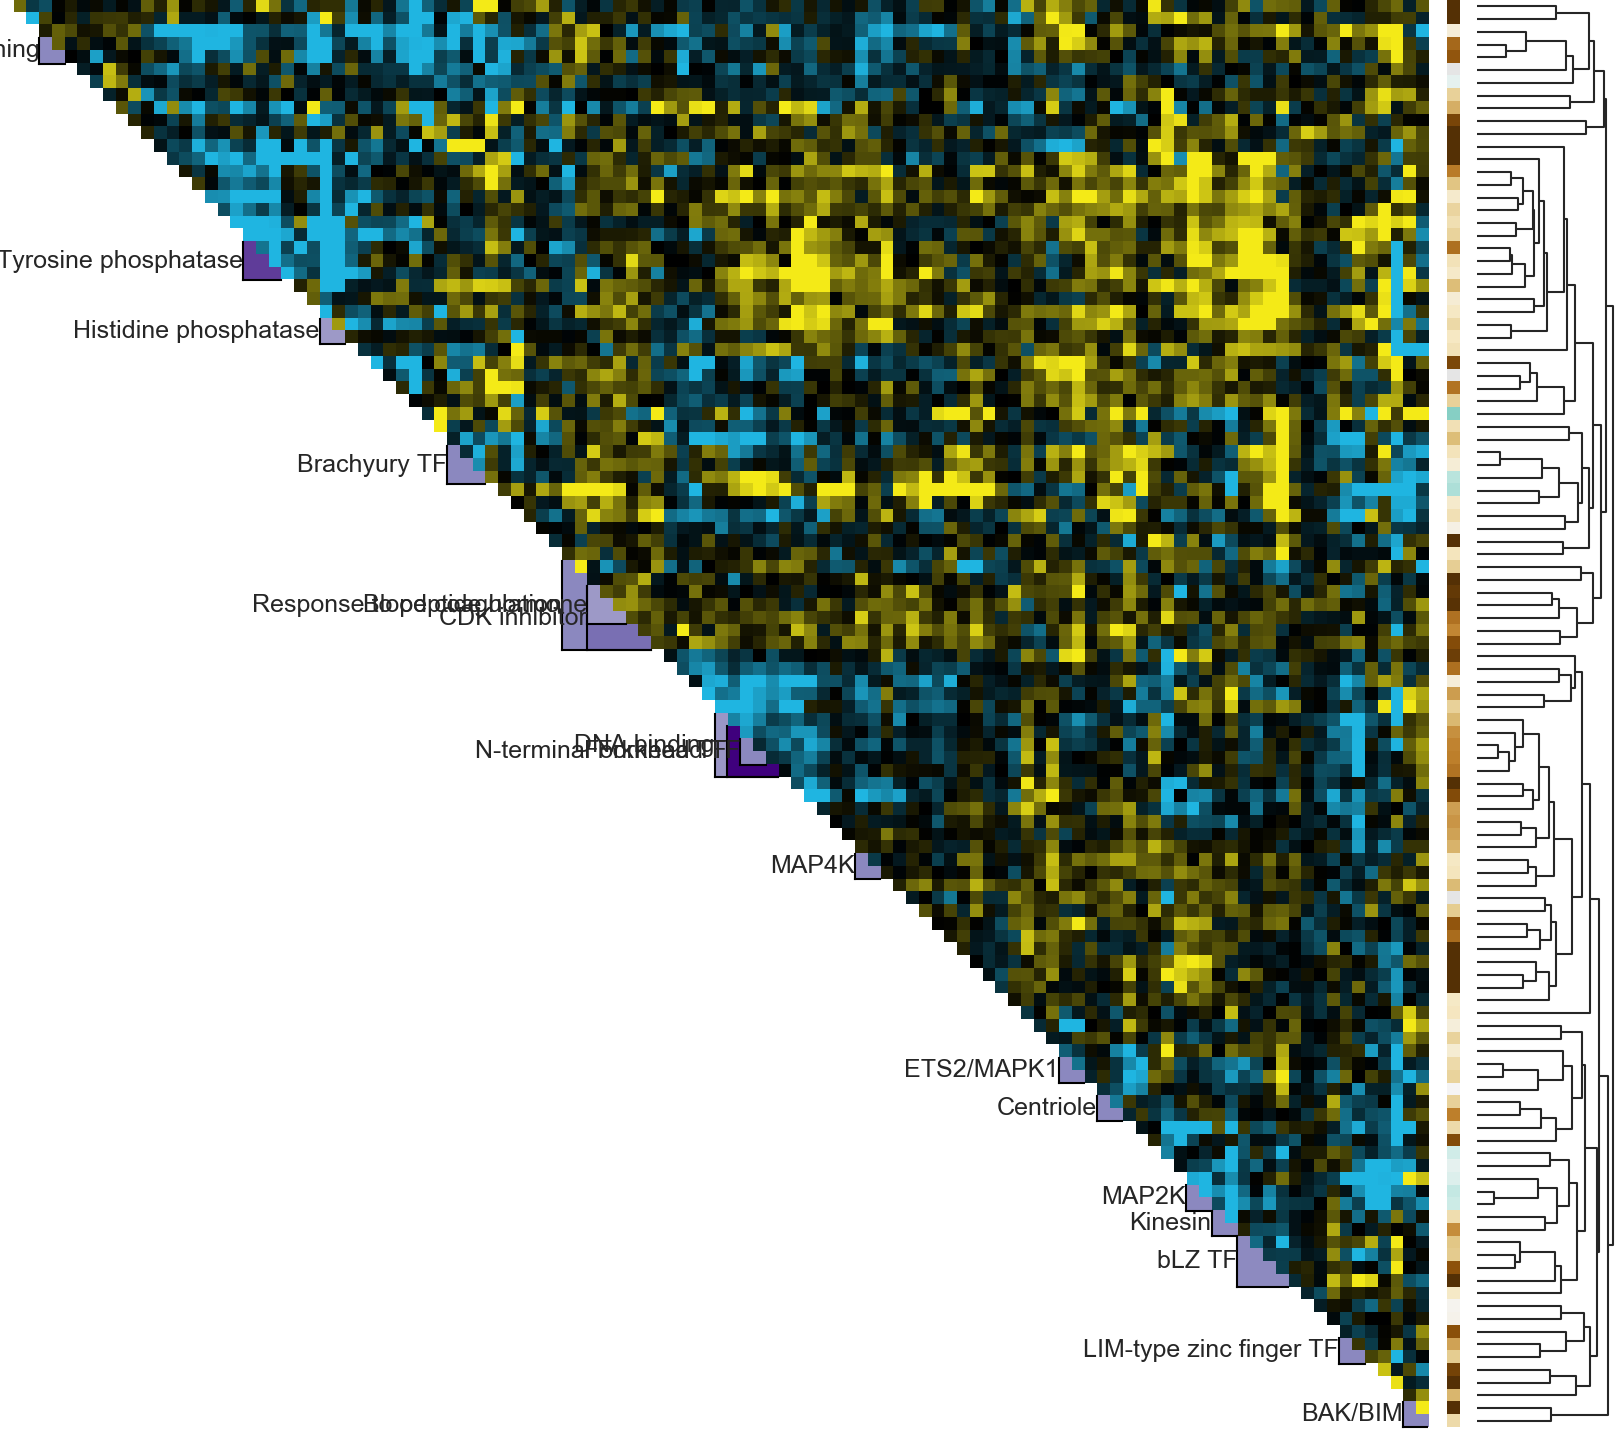

In [88]:
fig, axis = plt.subplots(figsize=(2.7*2,2.4*2))
nrows, ncols = 1, 3
gs = plt.GridSpec(nrows,ncols, width_ratios=(6,0.2,0.6), wspace=0.0, hspace=0.0, figure=fig,
                         left=0,right=1,top=1,bottom=0)#, height_ratios=(2.5)


axes = np.ndarray((nrows,ncols), dtype='object')
for i in range(nrows):
    for j in range(ncols):
        axes[i,j] = plt.subplot(gs[i,j])

        axis = axes[i,j]
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
        axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')

        axis.set_xticks([])
        axis.set_yticks([])
        
#         axis.set_aspect('equal')


##dendrogram
axis = axes[0,2]

with plt.rc_context({'lines.linewidth': 0.5}):
    dend = sp.cluster.hierarchy.dendrogram(dend_combined,
            no_plot=False, color_threshold=0, above_threshold_color=almost_black, no_labels=True,
                                       orientation='right', ax=axis)


axis.set_ylim(((len(leaf_order)+1)*10), (0)*10)

##annotations
enrichment_matrix = np.zeros((len(leaf_order), len(leaf_order), 4))
for depth, col in node_to_parent_table.iteritems():
    for topnode, group in col.groupby(col):
        minindex = int(min(leaf_order.loc[group.index, 'clustered_order'].dropna())) #- 0.5
        maxindex = int(max(leaf_order.loc[group.index, 'clustered_order'].dropna())) #+ 0.5
        
        axes[0,0].plot((minindex - 0.5, minindex - 0.5), (minindex - 0.5, maxindex + 0.5), 'k-', lw=.5)
        axes[0,0].plot((minindex - 0.5, maxindex + 0.5), (maxindex + 0.5, maxindex + 0.5), 'k-', lw=.5)
        
        axes[0,0].text(minindex - 0.5, (maxindex - minindex) / 2.0 + minindex, eligible_parent_nodes.loc[int(topnode), 'short name'],
                 horizontalalignment='right', verticalalignment='center', fontsize=6)
        
        enrichment_matrix[minindex:maxindex+1, minindex:maxindex+1] \
            = matplotlib.cm.Purples_r(scale_to_fraction(np.array([eligible_parent_nodes.loc[int(topnode), 'logp']]), np.log(10**-6.6),np.log(10**-3.3),0))
            

##maps
axis = axes[0,0]

emap_gene_ordered = emap_gene.loc[leaf_order.index, leaf_order.index]
axis.imshow(blue_yellow(scale_to_fraction(np.ma.masked_array(
                emap_gene_ordered.values, 
                mask=emap_gene_ordered.isnull()), -4.0, 0.0, 4.0)) 
            * np.triu(np.ones(emap_gene_ordered.shape), 1).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1))
           + enrichment_matrix * np.tril(np.ones(emap_gene_ordered.shape), 0).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1)), interpolation='nearest')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))

##phenotype
axis = axes[0,1]

axis.imshow(singlePhenotypes_genemean.loc[leaf_order.index].values.reshape((len(leaf_order),1)), interpolation='nearest', cmap=matplotlib.cm.BrBG, vmin=-.4, vmax=.4)
axis.set_ylim((len(leaf_order)+0.5, 0-0.5))

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/','emap'))

Doubles_Libraries/figs_crispra/png/552fig_emap.png


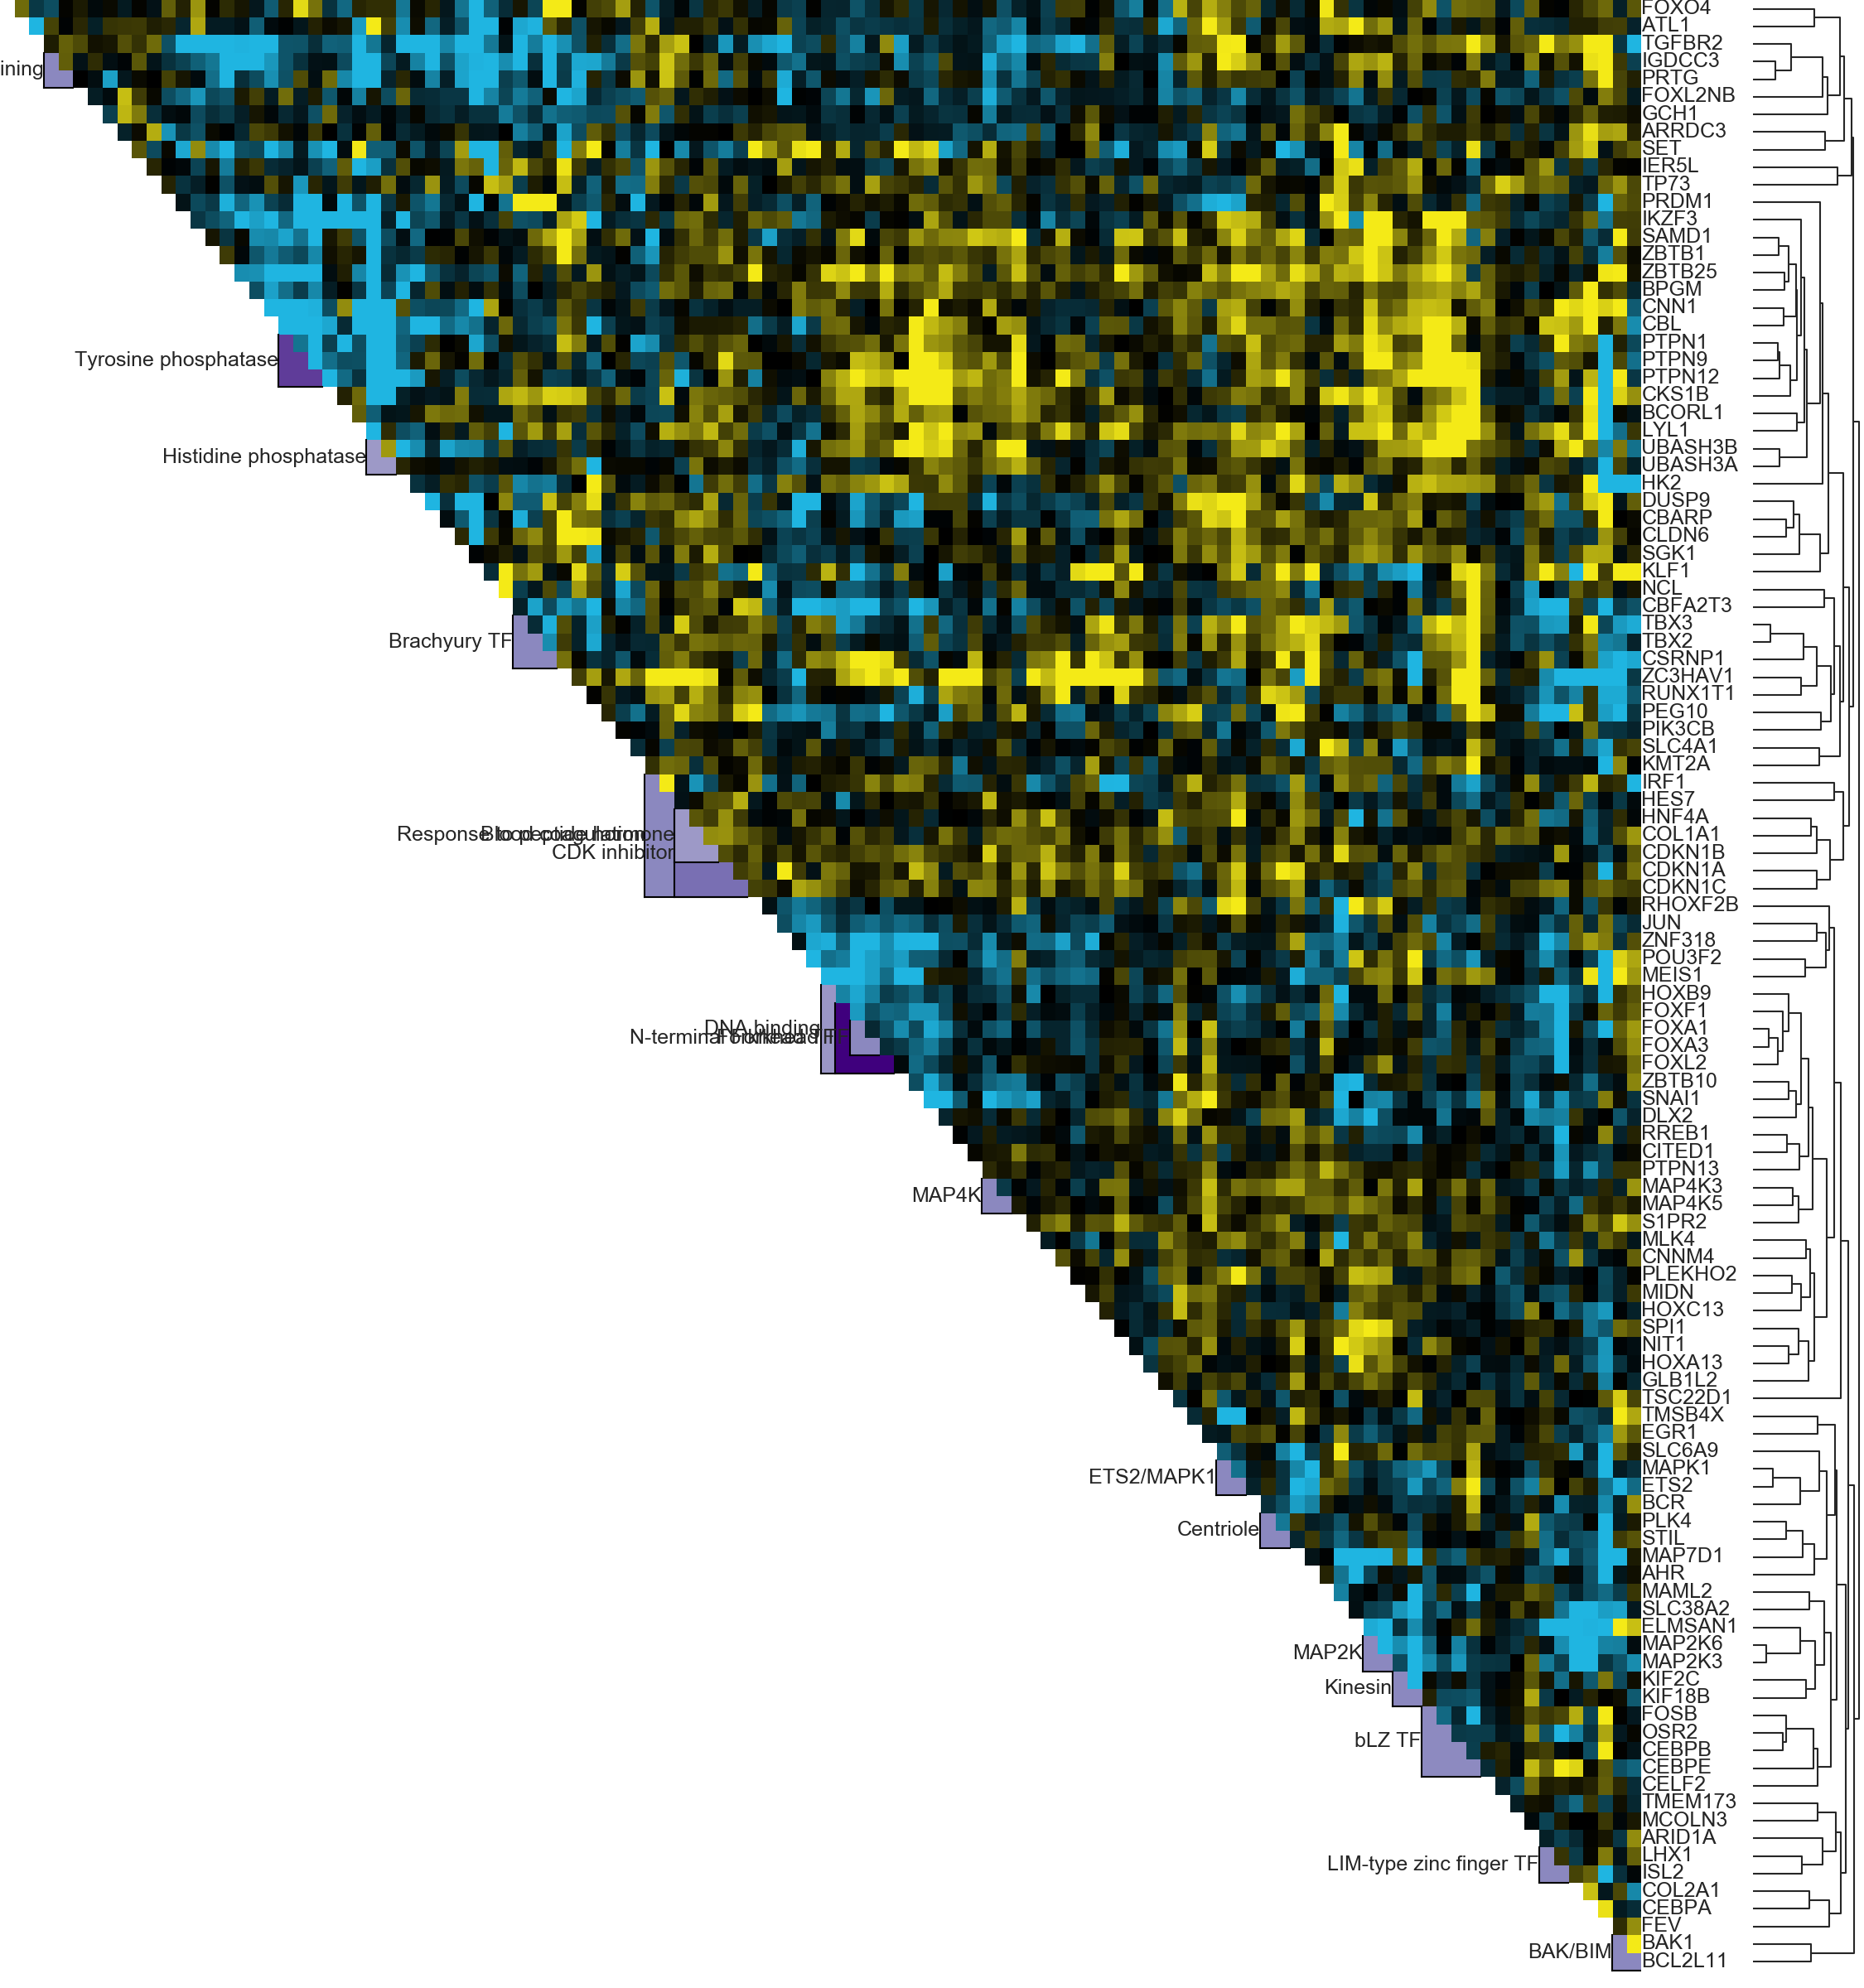

In [96]:
#replotting with gene names for supplement
fig, axis = plt.subplots(figsize=(7.5,8))
nrows, ncols = 1, 3
gs = plt.GridSpec(nrows,ncols, width_ratios=(5.9,0.4,0.4), wspace=0.0, hspace=0.0, figure=fig,
                         left=0,right=1,top=1,bottom=0)#, height_ratios=(2.5)


axes = np.ndarray((nrows,ncols), dtype='object')
for i in range(nrows):
    for j in range(ncols):
        axes[i,j] = plt.subplot(gs[i,j])

        axis = axes[i,j]
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
        axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')

        axis.set_xticks([])
        axis.set_yticks([])
        


##dendrogram
axis = axes[0,2]

with plt.rc_context({'lines.linewidth': 0.5}):
    dend = sp.cluster.hierarchy.dendrogram(dend_combined,
            no_plot=False, color_threshold=0, above_threshold_color=almost_black, no_labels=True,
                                       orientation='right', ax=axis)


axis.set_ylim(((len(leaf_order)+1)*10), (0)*10)

##annotations
enrichment_matrix = np.zeros((len(leaf_order), len(leaf_order), 4))
for depth, col in node_to_parent_table.iteritems():
    for topnode, group in col.groupby(col):
        minindex = int(min(leaf_order.loc[group.index, 'clustered_order'].dropna())) #- 0.5
        maxindex = int(max(leaf_order.loc[group.index, 'clustered_order'].dropna())) #+ 0.5
        
        axes[0,0].plot((minindex - 0.5, minindex - 0.5), (minindex - 0.5, maxindex + 0.5), 'k-', lw=.5)
        axes[0,0].plot((minindex - 0.5, maxindex + 0.5), (maxindex + 0.5, maxindex + 0.5), 'k-', lw=.5)
        
        axes[0,0].text(minindex - 0.5, (maxindex - minindex) / 2.0 + minindex, eligible_parent_nodes.loc[int(topnode), 'short name'],
                 horizontalalignment='right', verticalalignment='center', fontsize=6)
        
        enrichment_matrix[minindex:maxindex+1, minindex:maxindex+1] \
            = matplotlib.cm.Purples_r(scale_to_fraction(np.array([eligible_parent_nodes.loc[int(topnode), 'logp']]), np.log(10**-6.6),np.log(10**-3.3),0))
            

##maps
axis = axes[0,0]

emap_gene_ordered = emap_gene.loc[leaf_order.index, leaf_order.index]
axis.imshow(blue_yellow(scale_to_fraction(np.ma.masked_array(
                emap_gene_ordered.values, 
                mask=emap_gene_ordered.isnull()), -4.0, 0.0, 4.0)) 
            * np.triu(np.ones(emap_gene_ordered.shape), 1).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1))
           + enrichment_matrix * np.tril(np.ones(emap_gene_ordered.shape), 0).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1)), interpolation='nearest')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))
axis.set_aspect('auto')

##gene names
axis = axes[0,1]

for i, (gene, row) in enumerate(emap_perturb_combined.loc[leaf_order.index].iterrows()):
    axis.text(0, i, gene, fontsize=6, horizontalalignment = 'left', verticalalignment='center')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/','emap'))

Doubles_Libraries/figs_crispra/png/553fig_colorbars.png


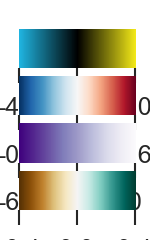

In [97]:
colorscales = [
    (blue_yellow, -4.0, 0.0, 4.0),
    (red_blue, -0.6, 0.0, 0.6),
    (matplotlib.cm.Purples_r, -6.6, -3.3,0),
    (matplotlib.cm.BrBG, -0.4, 0.0, 0.4)
]

fig, axes = plt.subplots(nrows=len(colorscales), figsize = (0.5, 0.2*len(colorscales)))

for i, colortup in enumerate(colorscales):
    axis = axes[i]
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
    axis.set_yticks([])
    
    axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='6')
    
    axis.imshow(colortup[0](np.vstack((np.linspace(0,1,256),np.linspace(0,1,256)))), aspect='auto')
    
    axis.set_xticks([0,127,255])
    axis.set_xticklabels(colortup[1:])
    
Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/','colorbars'))

In [109]:
emap_perturb_combined = perturb_map

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

IPR013638:Fork-head N-terminal (-8.624252) 
	was folded up into
IPR018122:Transcription factor, fork head, conserved site (-11.863117)

GO:0030225~macrophage differentiation (-7.525640) 
	was folded up into
PIRSF005879:CCAAT/enhancer-binding protein (-12.170031)

PIRSF005879:CCAAT/enhancer-binding protein (-12.170031) 
	was folded up into
IPR004827:Basic-leucine zipper domain (-12.207464)



In [110]:
shortnames = []

accepted_nodes = reduce(np.union1d, node_to_parent_table.values)
accepted_nodes = accepted_nodes[np.isfinite(accepted_nodes)]

for n, row in eligible_parent_nodes.iterrows():
    if n in accepted_nodes:
        print row['term'], row['logp']
        print 'Genes in node:', ' '.join([leaf_order.reset_index().set_index('leaf_id').loc[l,'index'] for l in range(len(emap_perturb_combined)) if n in node_to_parent_table.loc[leaf_order.reset_index().set_index('leaf_id').loc[l,'index']].values])
        print 'Genes in term:', ' '.join(leaf_order.reset_index().set_index('leaf_id').loc[david_matrix[row['term']] == 1,'index'])
        shortnames.append(raw_input())
    else:
        shortnames.append(np.nan)

hsa04320:Dorso-ventral axis formation -8.62425226371
Genes in node: ETS2 MAPK1
Genes in term: MAPK1 ETS2
MAPK1-ETS2
IPR022067:Homeobox protein Hox1A3 N-terminal -8.62425226371
Genes in node: HOXC13 HOXA13
Genes in term: HOXA13 HOXC13
N-terminal Homeobox TF
IPR003598:Immunoglobulin subtype 2 -8.62425226371
Genes in node: PRTG IGDCC3
Genes in term: IGDCC3 PRTG
Ig domain containing
GO:0009968~negative regulation of signal transduction -8.62425226371
Genes in node: UBASH3B PTPN1
Genes in term: UBASH3B PTPN1
negative regulation of signal transduction
GO:0035897~proteolysis in other organism -8.62425226371
Genes in node: MAP2K3 MAP2K6
Genes in term: MAP2K3 MAP2K6
MAP2K
GO:0030971~receptor tyrosine kinase binding -7.52563997504
Genes in node: UBASH3B CBL PTPN1
Genes in term: CBL PTPN1
RTK binding
222800~Erythrocytosis due to bisphosphoglycerate mutase deficiency -7.52563997504
Genes in node: BPGM ZBTB25 CNN1
Genes in term: BPGM CNN1
Erythrocytosis
IPR018122:Transcription factor, fork head, co

In [111]:
eligible_parent_nodes['short name'] = shortnames

Doubles_Libraries/figs_crispra/png/555fig_emap.png


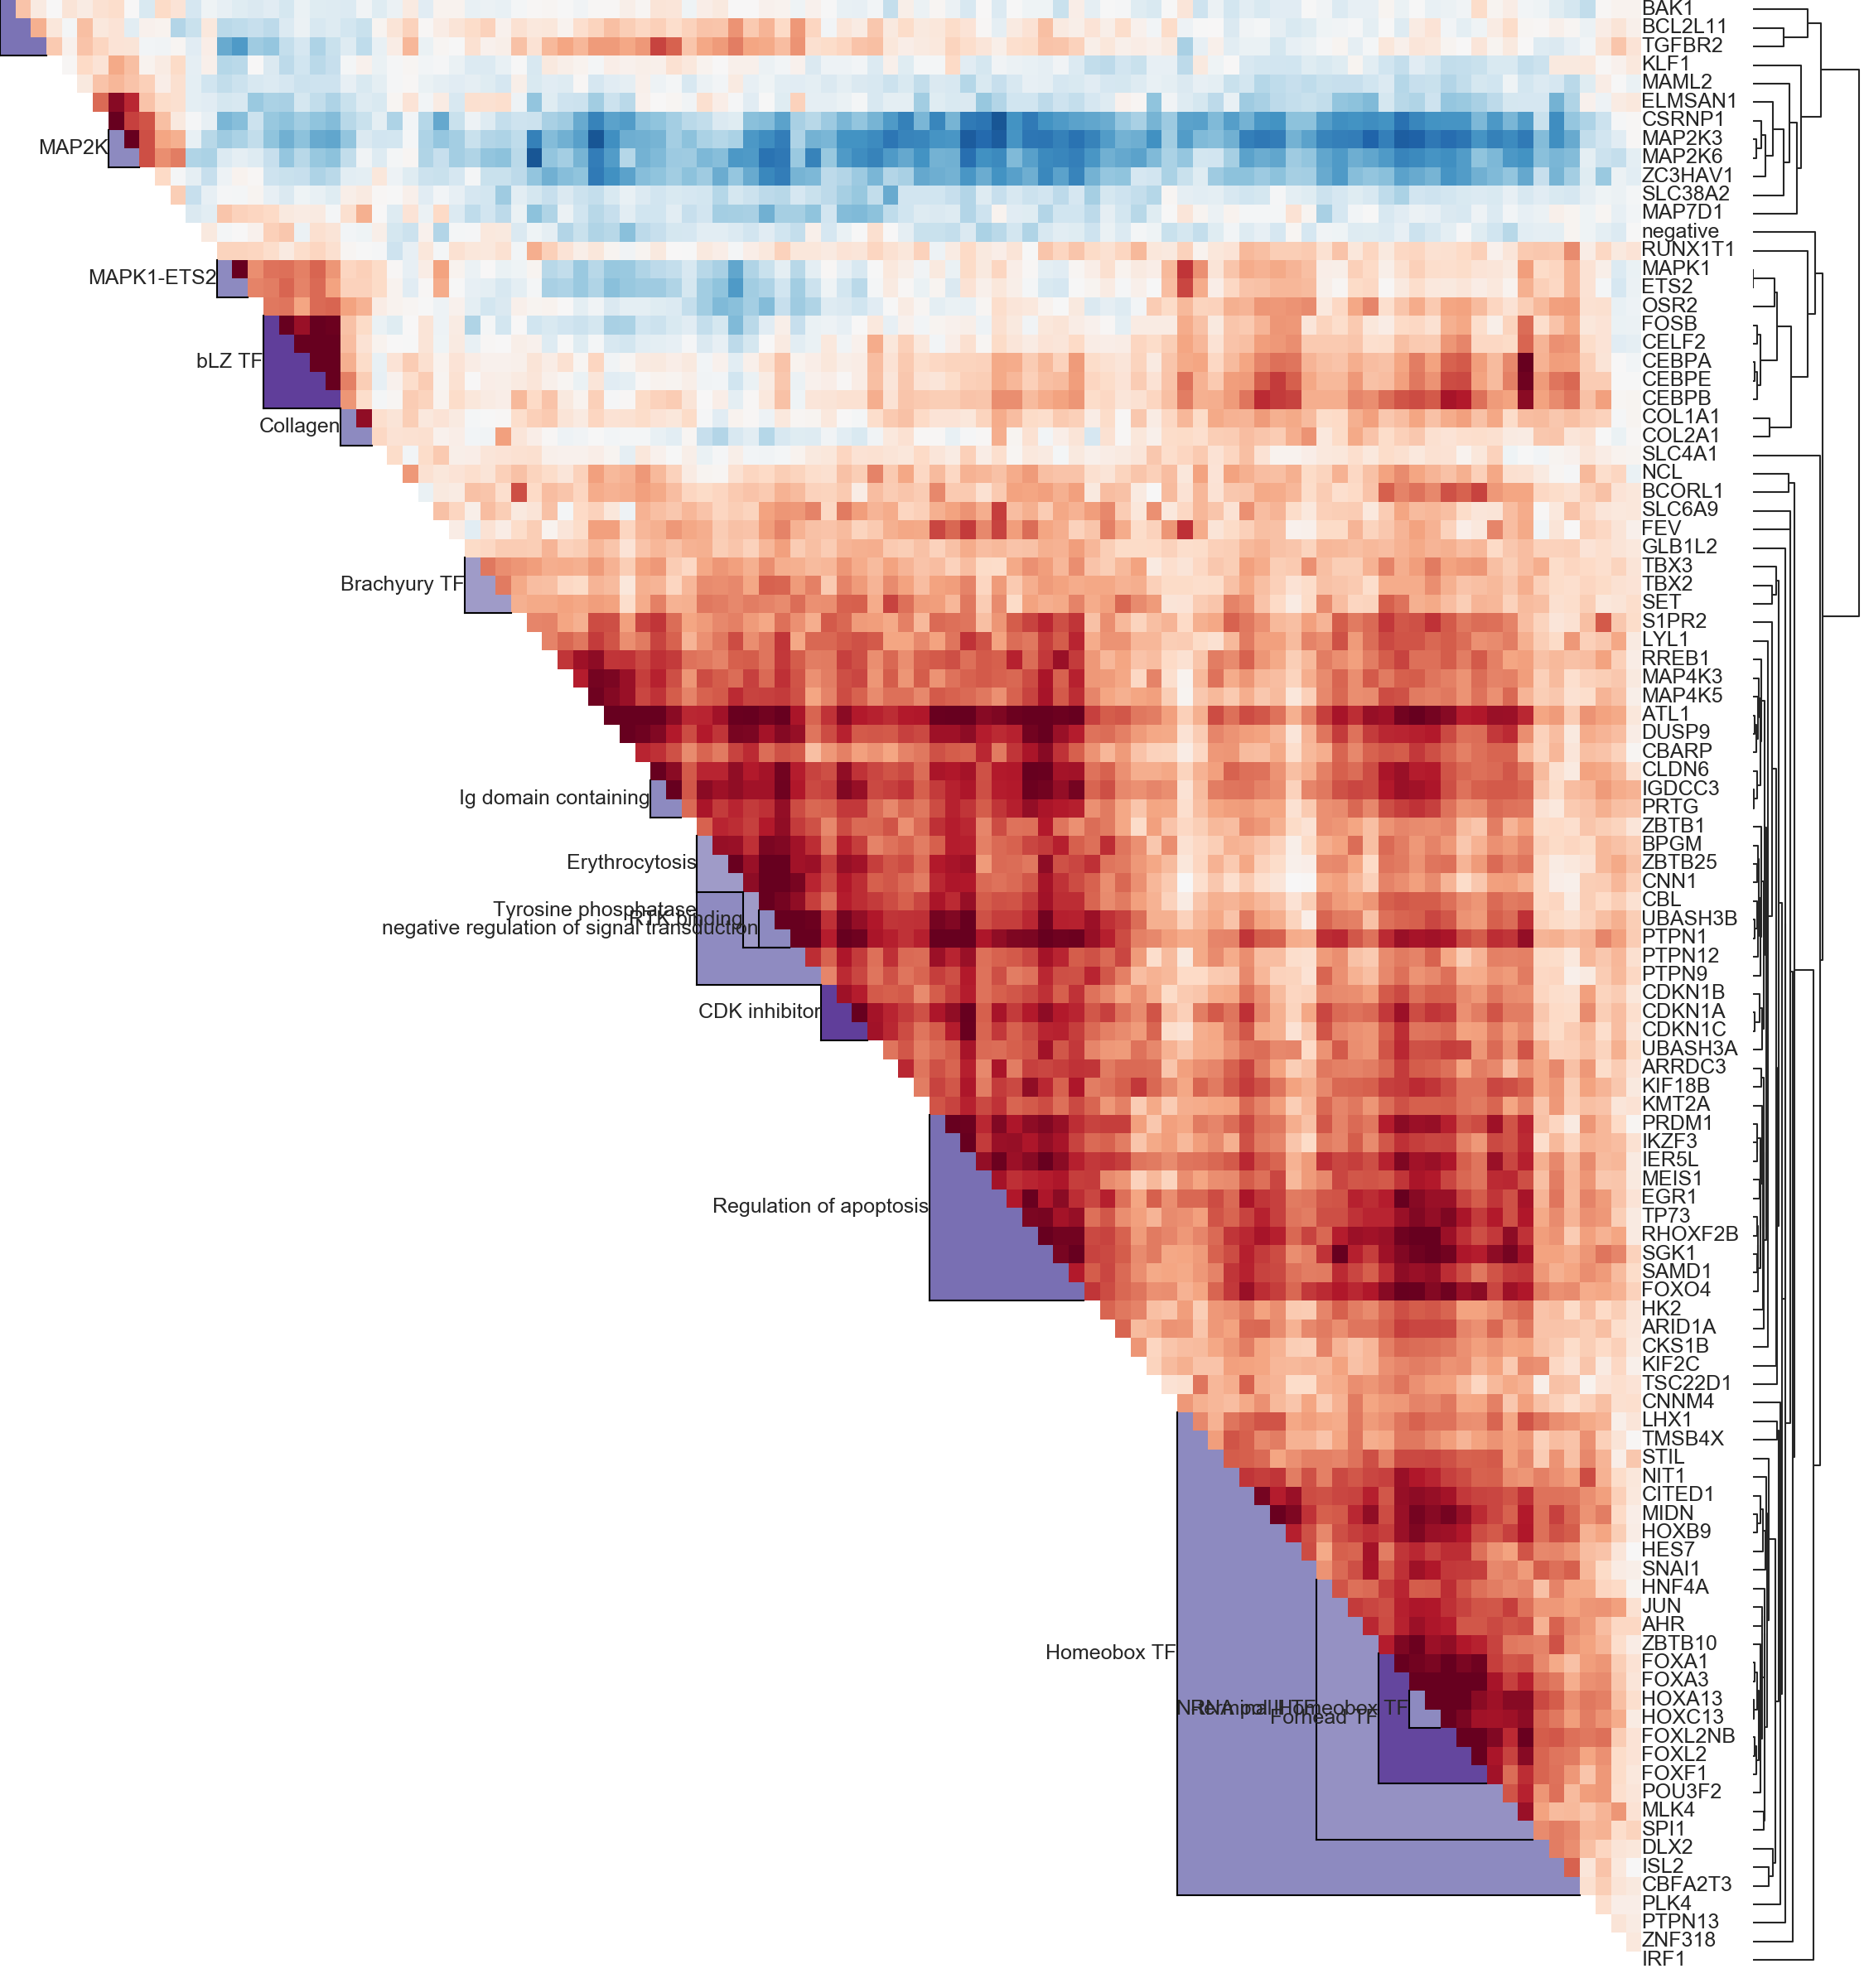

In [112]:
#replotting with gene names for supplement
fig, axis = plt.subplots(figsize=(7.5,8))
nrows, ncols = 1, 3
gs = plt.GridSpec(nrows,ncols, width_ratios=(5.9,0.4,0.4), wspace=0.0, hspace=0.0, figure=fig,
                         left=0,right=1,top=1,bottom=0)#, height_ratios=(2.5)


axes = np.ndarray((nrows,ncols), dtype='object')
for i in range(nrows):
    for j in range(ncols):
        axes[i,j] = plt.subplot(gs[i,j])

        axis = axes[i,j]
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
        axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')

        axis.set_xticks([])
        axis.set_yticks([])
        


##dendrogram
axis = axes[0,2]

with plt.rc_context({'lines.linewidth': 0.5}):
    dend = sp.cluster.hierarchy.dendrogram(dend_combined,
            no_plot=False, color_threshold=0, above_threshold_color=almost_black, no_labels=True,
                                       orientation='right', ax=axis)


axis.set_ylim(((len(leaf_order)+1)*10), (0)*10)

##annotations
enrichment_matrix = np.zeros((len(leaf_order), len(leaf_order), 4))
for depth, col in node_to_parent_table.iteritems():
    for topnode, group in col.groupby(col):
        minindex = int(min(leaf_order.loc[group.index, 'clustered_order'].dropna())) #- 0.5
        maxindex = int(max(leaf_order.loc[group.index, 'clustered_order'].dropna())) #+ 0.5
        
        axes[0,0].plot((minindex - 0.5, minindex - 0.5), (minindex - 0.5, maxindex + 0.5), 'k-', lw=.5)
        axes[0,0].plot((minindex - 0.5, maxindex + 0.5), (maxindex + 0.5, maxindex + 0.5), 'k-', lw=.5)
        
        axes[0,0].text(minindex - 0.5, (maxindex - minindex) / 2.0 + minindex, eligible_parent_nodes.loc[int(topnode), 'short name'],
                 horizontalalignment='right', verticalalignment='center', fontsize=6)
        
        enrichment_matrix[minindex:maxindex+1, minindex:maxindex+1] \
            = matplotlib.cm.Purples_r(scale_to_fraction(np.array([eligible_parent_nodes.loc[int(topnode), 'logp']]), np.log(10**-6.6),np.log(10**-3.3),0))
            

##maps
axis = axes[0,0]

perturb_map_ordered = perturb_map.loc[leaf_order.index, leaf_order.index]
axis.imshow(red_blue(scale_to_fraction(np.ma.masked_array(
                perturb_map_ordered.values, 
                mask=perturb_map_ordered.isnull()), -0.6, 0.0, 0.6)) 
            * np.triu(np.ones(perturb_map_ordered.shape), 1).reshape((perturb_map_ordered.shape[0], perturb_map_ordered.shape[1], 1))
           + enrichment_matrix * np.tril(np.ones(perturb_map_ordered.shape), 0).reshape((perturb_map_ordered.shape[0], perturb_map_ordered.shape[1], 1)), interpolation='nearest')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))
axis.set_aspect('auto')

##gene names
axis = axes[0,1]

for i, (gene, row) in enumerate(emap_perturb_combined.loc[leaf_order.index].iterrows()):
    axis.text(0, i, gene, fontsize=6, horizontalalignment = 'left', verticalalignment='center')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/','emap'))

In [113]:
overlap_genes = np.intersect1d(perturb_map.index, emap_gene.index)
emap_gene_corr = calculateCorrelationMatrix(emap_gene, diagNull=False)

combined_corrs = pd.concat((upperTriangle(emap_gene_corr.loc[overlap_genes, overlap_genes]), upperTriangle(perturb_map.loc[overlap_genes, overlap_genes])), 
                        axis=1)
combined_corrs.columns = ['GI corr', 'Perturb corr']
combined_corrs.head()

GI corr  Perturb corr
AHR ARID1A   0.131742      0.321193
    ARRDC3  -0.228654      0.296788
    ATL1    -0.340564      0.443419
    BAK1    -0.089306     -0.050828
    BCL2L11 -0.032660     -0.009292

(0.28700173805669194, 4.9491448460133155e-104)
Doubles_Libraries/figs_crispra/png/561fig_gi_vs_perturb.png


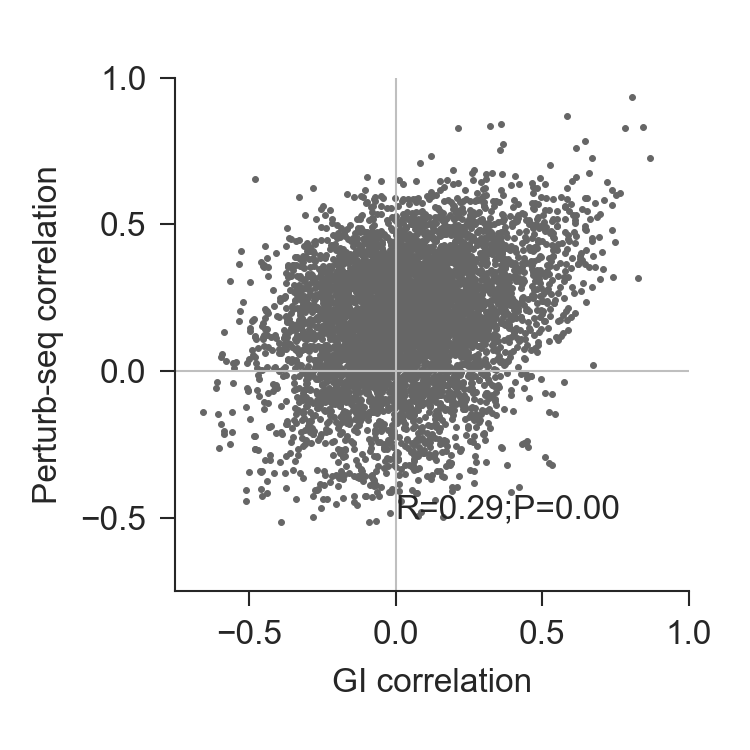

In [125]:
fig, axis = plt.subplots(figsize=(2.5,2.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
# axis.spines['left'].set_visible(False)
# axis.spines['bottom'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='8')

axis.set_aspect('equal')

axis.scatter(combined_corrs['GI corr'], 
            combined_corrs['Perturb corr'], alpha=1, s=2, color='#666666')

axis.text(0, -.5, 'R=%.2f;P=%.2f' % stats.pearsonr(combined_corrs['GI corr'], 
            combined_corrs['Perturb corr']), fontsize=8)
print stats.pearsonr(combined_corrs['GI corr'], 
            combined_corrs['Perturb corr'])

axis.plot((0,0), (-0.75,1), color='#BFBFBF', lw=.5)
axis.plot((-0.75,1), (0,0), color='#BFBFBF', lw=.5)

axis.set_xlim((-0.75,1.0))
axis.set_xticks(np.arange(-0.5,1.5,.5))
axis.set_ylim((-0.75,1.0))
axis.set_yticks(np.arange(-0.5,1.5,.5))

axis.set_xlabel('GI correlation', fontsize=8)
axis.set_ylabel('Perturb-seq correlation', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'gi_vs_perturb'))

In [118]:
from sklearn.decomposition import PCA

In [116]:
def get_first_component_line(xdata):
    pca = PCA()
    pca.fit(xdata)
    m = pca.components_[0,1]/pca.components_[0,0] #assuming 2 feature input
    b = pca.mean_[1] - m*pca.mean_[0] # b = y1 - m*x1
    
    return lambda xi: m*np.array(xi) + b

Doubles_Libraries/figs_crispra/png/564fig_gi_vs_perturb.png


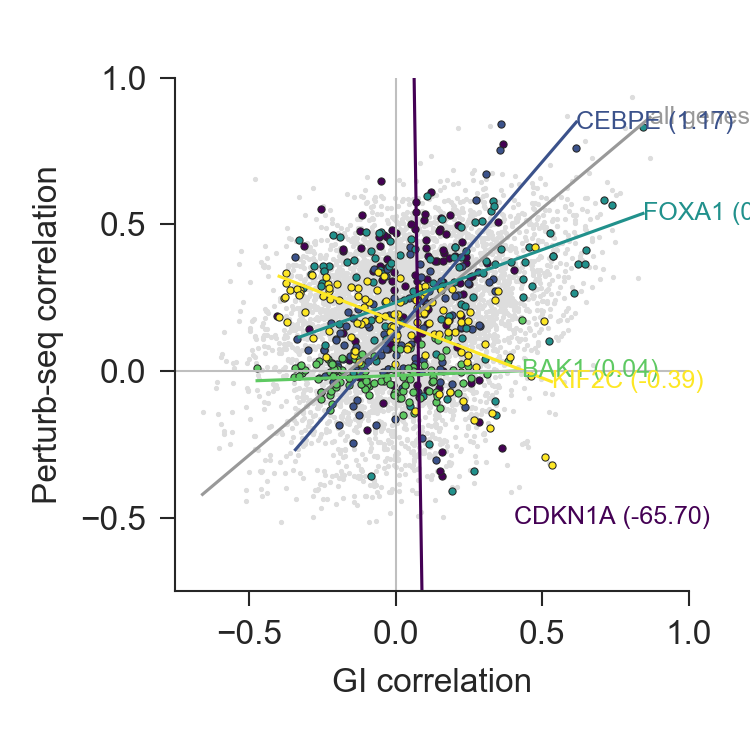

In [132]:
fig, axis = plt.subplots(figsize=(2.5,2.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
# axis.spines['left'].set_visible(False)
# axis.spines['bottom'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='8')

axis.set_aspect('equal')

axis.scatter(combined_corrs['GI corr'], 
            combined_corrs['Perturb corr'], alpha=1, s=1, color='#DDDDDD')

linfit = get_first_component_line(combined_corrs)
axis.plot((combined_corrs.min()[0], combined_corrs.max()[0]), linfit((combined_corrs.min()[0], combined_corrs.max()[0])), color='#999999', lw=.75)
slope = linfit(1) - linfit(0)
axis.text(combined_corrs.max()[0], min(linfit(combined_corrs.max()[0]), 1), 'all genes (%.2f)' % slope, fontsize=6, color='#999999', verticalalignment='center')

gene_list = ['CDKN1A', 'CEBPE', 'FOXA1', 'BAK1', 'KIF2C']
for i, gene in enumerate(gene_list):
    axis.scatter(emap_gene_corr.loc[gene, np.setdiff1d(overlap_genes,gene)],
                perturb_map.loc[gene, np.setdiff1d(overlap_genes,gene)], s=3, color=matplotlib.cm.viridis(i*1.0/(len(gene_list)-1)), edgecolor=almost_black)
    gene_combined_corrs = pd.concat((emap_gene_corr.loc[gene, np.setdiff1d(overlap_genes,gene)],
                perturb_map.loc[gene, np.setdiff1d(overlap_genes,gene)]), axis=1)
    linfit = get_first_component_line(gene_combined_corrs)
    axis.plot((gene_combined_corrs.min()[0], gene_combined_corrs.max()[0]), linfit((gene_combined_corrs.min()[0], gene_combined_corrs.max()[0])), color=matplotlib.cm.viridis(i*1.0/(len(gene_list)-1)), lw=.75)

    slope = linfit(1) - linfit(0)
    axis.text(min(gene_combined_corrs.max()[0], 0.9), max(min(linfit(gene_combined_corrs.max()[0]), 0.9), -0.5), '%s (%.2f)' % (gene, slope), fontsize=6, color=matplotlib.cm.viridis(i*1.0/(len(gene_list)-1)), verticalalignment='center')
    
axis.plot((0,0), (-0.75,1), color='#BFBFBF', lw=.5)
axis.plot((-0.75,1), (0,0), color='#BFBFBF', lw=.5)

axis.set_xlim((-0.75,1.0))
axis.set_xticks(np.arange(-0.5,1.5,.5))
axis.set_ylim((-0.75,1.0))
axis.set_yticks(np.arange(-0.5,1.5,.5))

axis.set_xlabel('GI correlation', fontsize=8)
axis.set_ylabel('Perturb-seq correlation', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'gi_vs_perturb'))

Doubles_Libraries/figs_crispra/png/574fig_gi_vs_perturb.png


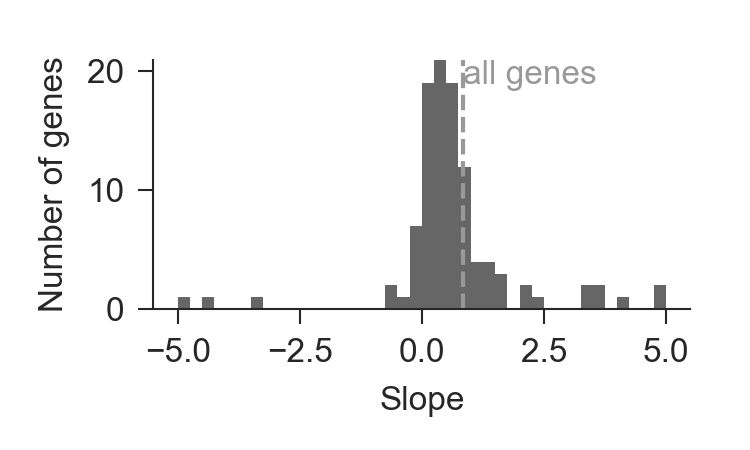

In [142]:
fig, axis = plt.subplots(figsize=(2.5,1.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='on', top='off', labelsize='8')

binrange = np.arange(-5,5.25,.25)

slopes = []
for i, gene in enumerate(overlap_genes):
    gene_combined_corrs = pd.concat((emap_gene_corr.loc[gene, np.setdiff1d(overlap_genes,gene)],
                perturb_map.loc[gene, np.setdiff1d(overlap_genes,gene)]), axis=1)
    linfit = get_first_component_line(gene_combined_corrs)

    slopes.append(min(max(linfit(1) - linfit(0), binrange[0]), binrange[-2]))
    
result = axis.hist(slopes, bins = binrange, color='#666666')

linfit = get_first_component_line(combined_corrs)
slope = linfit(1) - linfit(0)
axis.plot([slope]*2, [0, max(result[0])], '--', lw=1, color='#999999')
axis.text(slope, max(result[0]), 'all genes', verticalalignment='top', fontsize=8, color='#999999')

axis.set_ylim([0, max(result[0])])

axis.set_xlabel('Slope', fontsize=8)
axis.set_ylabel('Number of genes', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'gi_vs_perturb'))

In [143]:
len(emap_gene)

112

Doubles_Libraries/figs_crispra/png/575fig_single_vs_double.png


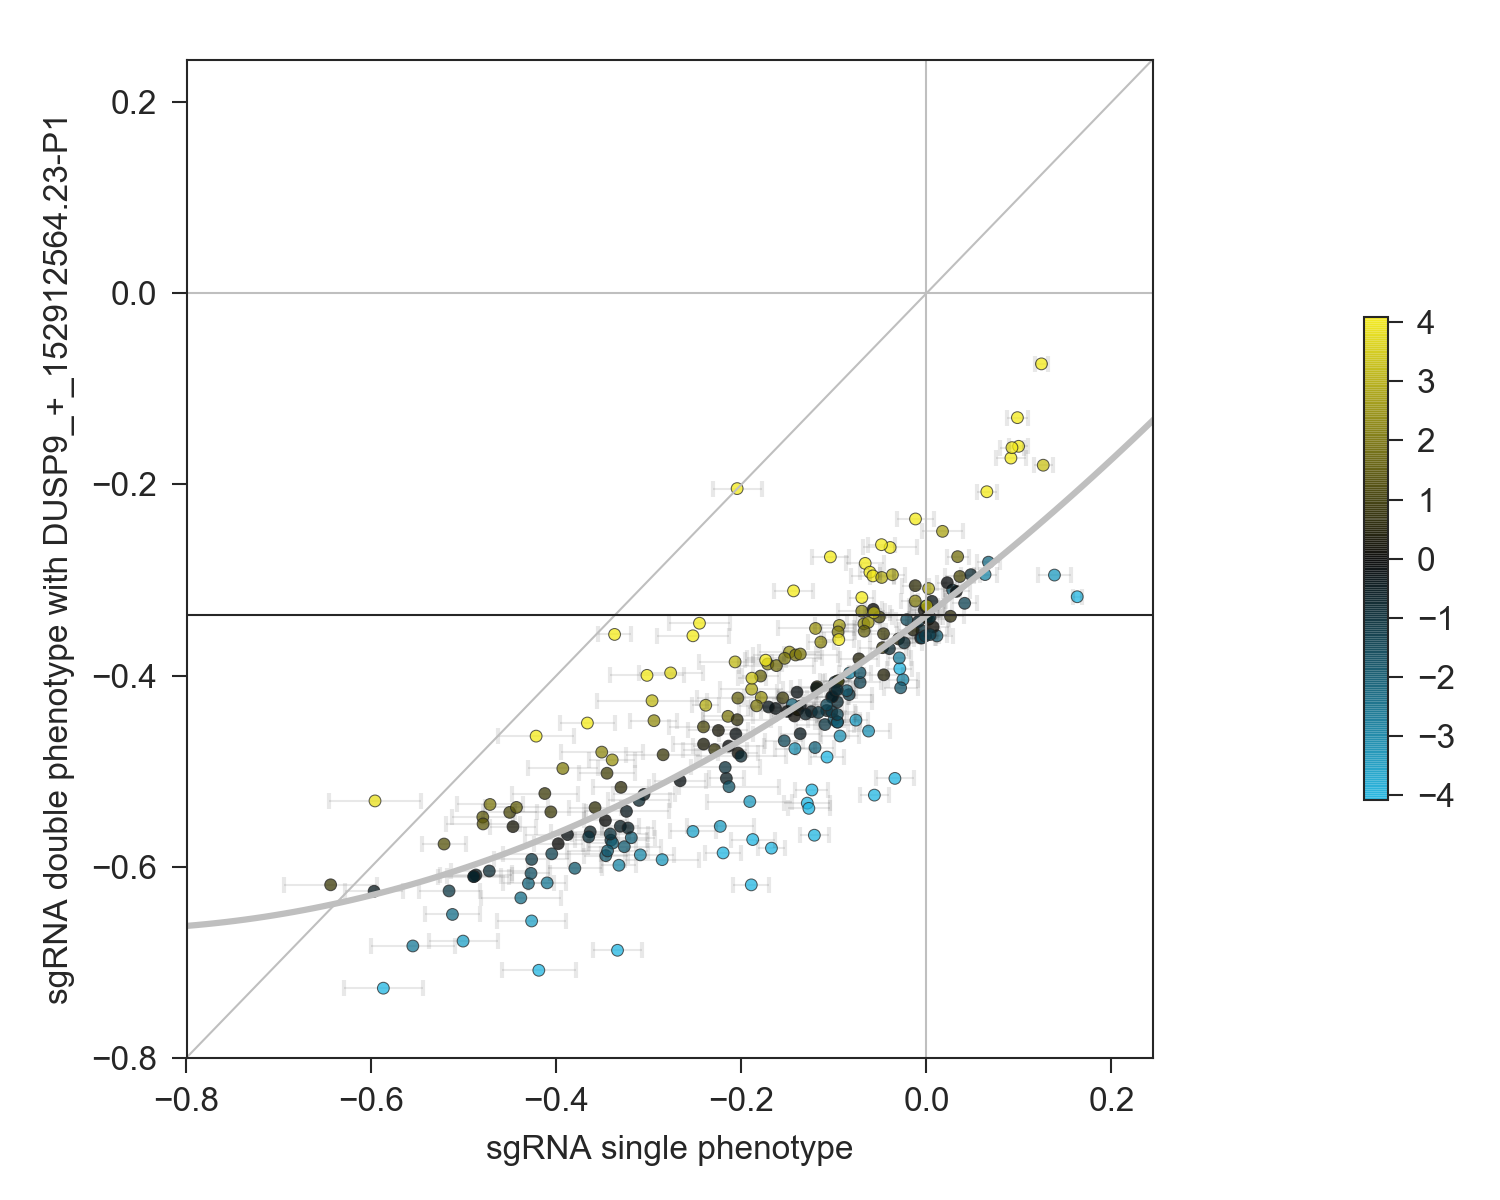

In [144]:
Image(saveFigures(plotSingleVsDouble_abba('DUSP9_+_152912564.23-P1', phenotypeMatrix_abba, singlePhenotypes_abba, emap_sgRNA_wnegs, fitFunction=quadFitForceIntercept), 'Doubles_Libraries/figs_crispra/', 'single_vs_double'))

In [379]:
#customized version for labeling/sizing to figure
def plotSingleVsDouble_abba_dusp(sgRNA, phenotypeMatrix, singlePhenotypes, emap, fitFunction=None, showXerr=True, singlesTable=None, showNegStd=True):
    fig, axis = plt.subplots(1,1,figsize=(3,2.5))

    variablePosition, fixedPosition = 'a','b'
    xdata1, ydata1, bdata1, xerr1 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)
    variablePosition, fixedPosition = 'b','a'
    xdata2, ydata2, bdata2, xerr2 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)

    minVal = np.nanmin([np.nanmin(xdata1), np.nanmin(ydata1), np.nanmin(xdata2), np.nanmin(ydata2)])
    maxVal = np.nanmax([np.nanmax(xdata1), np.nanmax(ydata1), np.nanmax(xdata2), np.nanmax(ydata2)])

    minVal *= 1.1
    maxVal *= 1.5

#     axis = axes[0]
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.plot((minVal,maxVal), (minVal,maxVal), color='#BFBFBF',lw=.5)
    axis.plot((minVal,maxVal), (0,0), color='#BFBFBF',lw=.5)
    axis.plot((0,0), (minVal,maxVal), color='#BFBFBF',lw=.5)
    
    if showXerr:
        axis.errorbar(xdata1, ydata1, xerr=xerr1, fmt='none', ecolor=almost_black, alpha=.1, lw=.5, capsize=2, zorder=1)

    colorRange = 4 #np.percentile(np.abs(np.reshape(emap.values, (len(emap)**2,))), 90)
    cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
    result = axis.scatter(xdata1, ydata1, c = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)((emap.loc[:,sgRNA] - (-1*colorRange)) / (colorRange - -1*colorRange)), s=8, alpha=.9, edgecolor = almost_black)#, cmap='BlueYellow', vmin=, vmax=colorRange)
    
    if singlesTable is not None:
        axis.scatter(xdata1.loc[singlesTable['gene'] == 'negative'], ydata1.loc[singlesTable['gene'] == 'negative'], c = 'none', s=8, alpha=1, edgecolor = '#e31a1c')

    axis.plot((minVal,maxVal), (bdata1,bdata1), '--', color=almost_black, lw=.5)

    if fitFunction:
        fit = fitFunction(xdata1, ydata1, bdata1)
        fitrange = np.linspace(xdata1.min(),xdata1.max(), 100)
        axis.plot(fitrange, fit(fitrange), color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) + singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) - singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)

    #labels
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'DUSP9'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'MAPK1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'ETS2'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'TGFBR2'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'MEIS1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'KLF1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'].apply(lambda g: g[:4] == 'CDKN')].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)

#     for sg, gene in emap_quad_std_wnegs.loc[sgRNA].sort_values().head(20).iteritems():
#         axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
#         axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
        
    axis.set_xlim((-0.75, maxVal))
    axis.set_ylim((minVal, 0.05))

    axis.set_xlabel('sgRNA single phenotype', fontsize=8)
    axis.set_ylabel(sgRNA, fontsize=8) #'sgRNA double phenotype with ' + 

    axis.xaxis.set_tick_params(labelsize=8)
    axis.yaxis.set_tick_params(labelsize=8)
    axis.yaxis.tick_left()
    axis.xaxis.tick_bottom()

#     axis = axes[1]
#     axis.spines['top'].set_visible(False)
#     axis.spines['bottom'].set_visible(False)
#     axis.spines['left'].set_visible(False)
#     axis.spines['right'].set_visible(False)
#     axis.set_xticks([])
#     axis.set_yticks([])

#     cbar = fig.colorbar(result, ax=axis, ticks=np.arange(-4,5,1))
#     cbar.ax.set_yticklabels(np.arange(-4,5,1), fontsize=8)

    plt.tight_layout()

    return fig


Doubles_Libraries/figs_crispra/png/636fig_single_vs_double.png


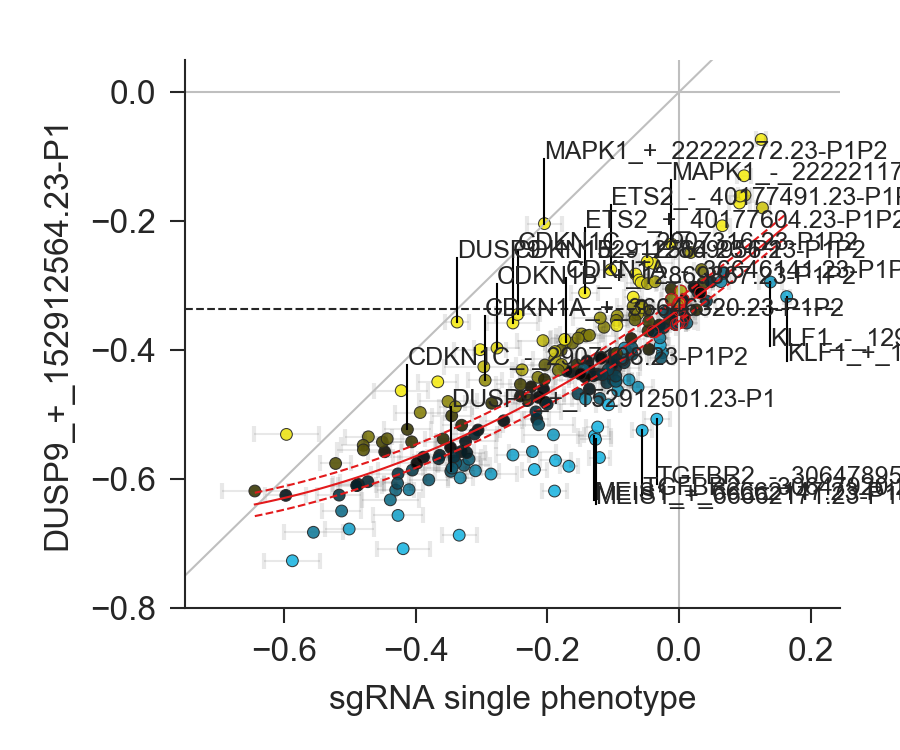

In [380]:
Image(saveFigures(plotSingleVsDouble_abba_dusp('DUSP9_+_152912564.23-P1', phenotypeMatrix_abba, singlePhenotypes_abba, emap_sgRNA_wnegs, fitFunction=quadFitForceIntercept, singlesTable=singlesTable), 'Doubles_Libraries/figs_crispra/', 'single_vs_double'))

In [392]:
singlePhenotypes_abba.sort_values('a.mean')

b.mean     b.std    a.mean  \
HOXA13_+_27239889.23-P1P2                -0.644088  0.050006 -0.644088   
TP73_+_3568744.23-P1P2                   -0.597111  0.031349 -0.597111   
CEBPA_+_33793624.23-P1P2                 -0.596125  0.049467 -0.596125   
NIT1_+_161087799.23-P1P2                 -0.587097  0.042658 -0.587097   
C3orf72_-_138665944.23-P1P2              -0.555234  0.045335 -0.555234   
HOXC13_+_54332230.23-P1P2                -0.521485  0.023931 -0.521485   
CEBPE_+_23588994.23-P1P2                 -0.516070  0.032950 -0.516070   
ZBTB10_+_81398318.23-P1P2                -0.512396  0.029482 -0.512396   
PRDM1_-_106534101.23-P1P2                -0.500923  0.037235 -0.500923   
SLC4A1_+_42345604.23-P1P2                -0.489485  0.038031 -0.489485   
IKZF3_-_38020571.23-P1P2                 -0.488949  0.029346 -0.488949   
C3orf72_-_138665928.23-P1P2              -0.486992  0.038885 -0.486992   
HES7_-_8027539.23-P1P2                   -0.479598  0.033145 -0.479598   
SPI1_+_47400397.23-P1P2                  -0.479289  0.040371 -0.479289   
CEBPB_+_48807216.23-P1P2                 -0.472576  0.041696 -0.472576   
ATL1_+_50999374.23-P1P2                  -0.471779  0.035891 -0.471779   
HNF4A_+_43029788.23-P1P2                 -0.450459  0.029447 -0.450459   
FOXO4_-_70315963.23-P1P2                 -0.446984  0.024779 -0.446984   
SPI1_+_47400477.23-P1P2                  -0.443218  0.034370 -0.443218   
HOXA13_+_27240051.23-P1P2                -0.438491  0.043188 -0.438491   
FOXO4_-_70315829.23-P1P2                 -0.430289  0.027732 -0.430289   
PRDM1_-_106534082.23-P1P2                -0.427488  0.020173 -0.427488   
HOXC13_-_54332182.23-P1P2                -0.426805  0.037388 -0.426805   
BAK1_-_33548176.23-P1P2                  -0.426758  0.040376 -0.426758   
ARID1A_+_27022167.23-P1P2                -0.421942  0.040781 -0.421942   
PLEKHO2_+_65133841.23-P1P2               -0.419032  0.040090 -0.419032   
CDKN1C_-_2907198.23-P1P2                 -0.412539  0.035796 -0.412539   
IKZF3_-_38020553.23-P1P2                 -0.410040  0.020501 -0.410040   
RHOXF2B_-_119211886.23-ENST00000371402.2 -0.406048  0.038426 -0.406048   
BAK1_+_33548177.23-P1P2                  -0.405054  0.052752 -0.405054   
...                                            ...       ...       ...   
negative_control_9                        0.000402  0.018748  0.000402   
negative_control_4                        0.000465  0.014308  0.000465   
negative_control_11                       0.001172  0.018463  0.001172   
TMEM173_-_138862534.23-P1P2               0.002334  0.020953  0.002334   
negative_control_0                        0.002381  0.018156  0.002381   
negative_control_6                        0.003959  0.014252  0.003959   
negative_control_2                        0.003984  0.017848  0.003984   
negative_control_8                        0.006015  0.015187  0.006015   
negative_control_13                       0.007341  0.016890  0.007341   
GCH1_-_55369897.23-P1P2                   0.011378  0.017794  0.011378   
MAP2K3_-_21187851.23-P1P2                 0.017391  0.022274  0.017391   
TBX2_+_59476912.23-P1P2                   0.022555  0.010834  0.022555   
SLC38A2_+_46766743.23-P1P2                0.026029  0.014110  0.026029   
SLC38A2_+_46766709.23-P1P2                0.028347  0.007854  0.028347   
negative_control_7                        0.032302  0.014547  0.032302   
ELMSAN1_+_74227119.23-P1                  0.033773  0.011796  0.033773   
BCR_-_23522198.23-P1P2                    0.036075  0.015483  0.036075   
GCH1_-_55369782.23-P1P2                   0.041339  0.013454  0.041339   
ELMSAN1_-_74227099.23-P1                  0.048040  0.010239  0.048040   
MAML2_-_96076499.23-P1P2                  0.063402  0.012445  0.063402   
MAP2K6_+_67410733.23-P1P2                 0.065314  0.011159  0.065314   
MAML2_-_96076530.23-P1P2                  0.067088  0.012761  0.067088   
CSRNP1_-_39196126.23-P1P2                 0.0913

In [396]:
emap_sgRNA.loc['BAK1_-_33548176.23-P1P2'].sort_values()

ZC3HAV1_+_138794578.23-P1P2             -22.018009
ZC3HAV1_+_138794557.23-P1P2             -11.343354
CSRNP1_+_39196217.23-P1P2               -10.572139
PEG10_+_94285426.23-P1                  -10.374510
HK2_+_75060993.23-P1P2                   -9.028641
CSRNP1_-_39196126.23-P1P2                -7.739032
SLC38A2_+_46766709.23-P1P2               -7.557766
MAP2K6_+_67410755.23-P1P2                -7.326360
HK2_+_75061007.23-P1P2                   -6.933945
TBX2_+_59476912.23-P1P2                  -6.450017
TBX3_+_115122163.23-P1P2                 -5.405178
MAP7D1_+_36621448.23-P1P2                -5.330368
MAP7D1_+_36621468.23-P1P2                -5.107096
RUNX1T1_+_93115566.23-P2                 -5.016713
LYL1_+_13213738.23-P1P2                  -4.964295
MAP2K3_-_21187851.23-P1P2                -4.360532
DLX2_-_172967775.23-P1P2                 -4.336124
ETS2_-_40177491.23-P1P2                  -4.220938
ETS2_+_40177604.23-P1P2                  -4.062986
CEBPE_-_23589034.23-P1P2       

In [407]:
#customized version for labeling/sizing to figure
def plotSingleVsDouble_abba_bak(sgRNA, phenotypeMatrix, singlePhenotypes, emap, fitFunction=None, showXerr=True, singlesTable=None, showNegStd=True):
    fig, axis = plt.subplots(1,1,figsize=(3,2.5))

    variablePosition, fixedPosition = 'a','b'
    xdata1, ydata1, bdata1, xerr1 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)
    variablePosition, fixedPosition = 'b','a'
    xdata2, ydata2, bdata2, xerr2 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)

    minVal = np.nanmin([np.nanmin(xdata1), np.nanmin(ydata1), np.nanmin(xdata2), np.nanmin(ydata2)])
    maxVal = np.nanmax([np.nanmax(xdata1), np.nanmax(ydata1), np.nanmax(xdata2), np.nanmax(ydata2)])

    minVal *= 1.1
    maxVal *= 1.5

#     axis = axes[0]
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.plot((minVal,maxVal), (minVal,maxVal), color='#BFBFBF',lw=.5)
    axis.plot((minVal,maxVal), (0,0), color='#BFBFBF',lw=.5)
    axis.plot((0,0), (minVal,maxVal), color='#BFBFBF',lw=.5)
    
    if showXerr:
        axis.errorbar(xdata1, ydata1, xerr=xerr1, fmt='none', ecolor=almost_black, alpha=.1, lw=.5, capsize=2, zorder=1)

    colorRange = 4 #np.percentile(np.abs(np.reshape(emap.values, (len(emap)**2,))), 90)
    cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
    result = axis.scatter(xdata1, ydata1, c = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)((emap.loc[:,sgRNA] - (-1*colorRange)) / (colorRange - -1*colorRange)), s=8, alpha=.9, edgecolor = almost_black)#, cmap='BlueYellow', vmin=, vmax=colorRange)
    
    if singlesTable is not None:
        axis.scatter(xdata1.loc[singlesTable['gene'] == 'negative'], ydata1.loc[singlesTable['gene'] == 'negative'], c = 'none', s=8, alpha=1, edgecolor = '#e31a1c')

    axis.plot((minVal,maxVal), (bdata1,bdata1), '--', color=almost_black, lw=.5)

    if fitFunction:
        fit = fitFunction(xdata1, ydata1, bdata1)
        fitrange = np.linspace(xdata1.min(),xdata1.max(), 100)
        axis.plot(fitrange, fit(fitrange), color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) + singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) - singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)

    #labels
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'BAK1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'BCL2L11'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'TMSB4X'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'MAP7D1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'ZBTB25'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'KLF1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'CNN1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        

#     for sg, gene in emap_quad_std_wnegs.loc[sgRNA].sort_values().head(20).iteritems():
#         axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
#         axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
        
    axis.set_xlim((-0.75, maxVal))
    axis.set_ylim((minVal, 0.05))

    axis.set_xlabel('sgRNA single phenotype', fontsize=8)
    axis.set_ylabel(sgRNA, fontsize=8) #'sgRNA double phenotype with ' + 

    axis.xaxis.set_tick_params(labelsize=8)
    axis.yaxis.set_tick_params(labelsize=8)
    axis.yaxis.tick_left()
    axis.xaxis.tick_bottom()

#     axis = axes[1]
#     axis.spines['top'].set_visible(False)
#     axis.spines['bottom'].set_visible(False)
#     axis.spines['left'].set_visible(False)
#     axis.spines['right'].set_visible(False)
#     axis.set_xticks([])
#     axis.set_yticks([])

#     cbar = fig.colorbar(result, ax=axis, ticks=np.arange(-4,5,1))
#     cbar.ax.set_yticklabels(np.arange(-4,5,1), fontsize=8)

    plt.tight_layout()

    return fig


Doubles_Libraries/figs_crispra/png/648fig_single_vs_double.png


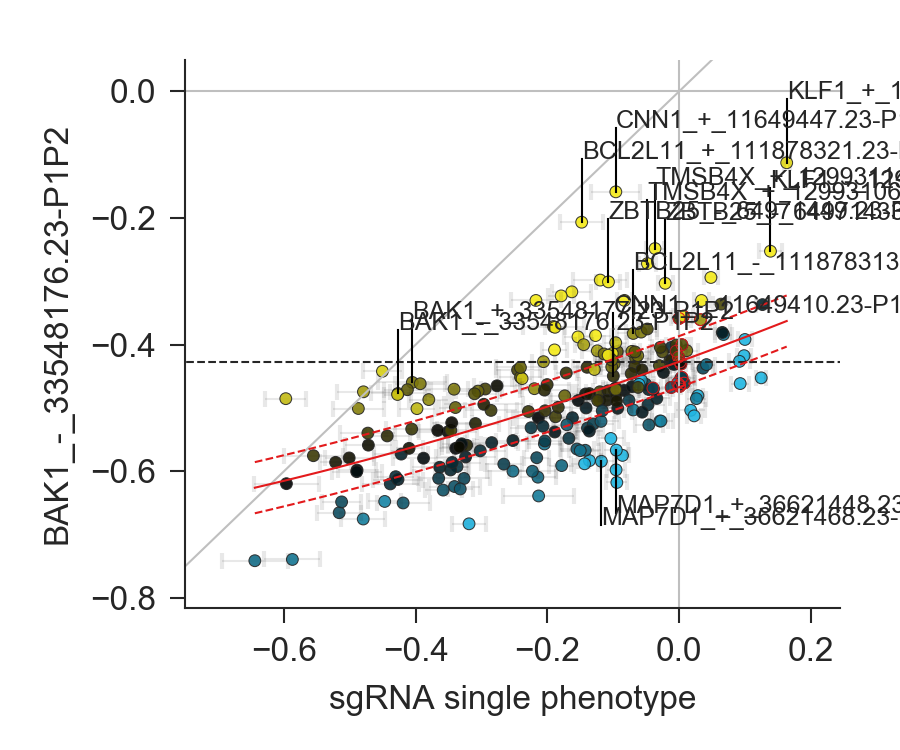

In [408]:
Image(saveFigures(plotSingleVsDouble_abba_bak('BAK1_-_33548176.23-P1P2', phenotypeMatrix_abba, singlePhenotypes_abba, emap_sgRNA_wnegs, fitFunction=quadFitForceIntercept, singlesTable=singlesTable), 'Doubles_Libraries/figs_crispra/', 'single_vs_double'))

In [390]:
#customized version for labeling/sizing to figure
def plotSingleVsDouble_abba_cbl(sgRNA, phenotypeMatrix, singlePhenotypes, emap, fitFunction=None, showXerr=True, singlesTable=None, showNegStd=True):
    fig, axis = plt.subplots(1,1,figsize=(3,2.5))

    variablePosition, fixedPosition = 'a','b'
    xdata1, ydata1, bdata1, xerr1 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)
    variablePosition, fixedPosition = 'b','a'
    xdata2, ydata2, bdata2, xerr2 = getXYB(sgRNA, singlePhenotypes, phenotypeMatrix, variablePosition, fixedPosition, True)

    minVal = np.nanmin([np.nanmin(xdata1), np.nanmin(ydata1), np.nanmin(xdata2), np.nanmin(ydata2)])
    maxVal = np.nanmax([np.nanmax(xdata1), np.nanmax(ydata1), np.nanmax(xdata2), np.nanmax(ydata2)])

    minVal *= 1.1
    maxVal *= 1.5

#     axis = axes[0]
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.plot((minVal,maxVal), (minVal,maxVal), color='#BFBFBF',lw=.5)
    axis.plot((minVal,maxVal), (0,0), color='#BFBFBF',lw=.5)
    axis.plot((0,0), (minVal,maxVal), color='#BFBFBF',lw=.5)
    
    if showXerr:
        axis.errorbar(xdata1, ydata1, xerr=xerr1, fmt='none', ecolor=almost_black, alpha=.1, lw=.5, capsize=2, zorder=1)

    colorRange = 4 #np.percentile(np.abs(np.reshape(emap.values, (len(emap)**2,))), 90)
    cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
    result = axis.scatter(xdata1, ydata1, c = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)((emap.loc[:,sgRNA] - (-1*colorRange)) / (colorRange - -1*colorRange)), s=8, alpha=.9, edgecolor = almost_black)#, cmap='BlueYellow', vmin=, vmax=colorRange)
    
    if singlesTable is not None:
        axis.scatter(xdata1.loc[singlesTable['gene'] == 'negative'], ydata1.loc[singlesTable['gene'] == 'negative'], c = 'none', s=8, alpha=1, edgecolor = '#e31a1c')

    axis.plot((minVal,maxVal), (bdata1,bdata1), '--', color=almost_black, lw=.5)

    if fitFunction:
        fit = fitFunction(xdata1, ydata1, bdata1)
        fitrange = np.linspace(xdata1.min(),xdata1.max(), 100)
        axis.plot(fitrange, fit(fitrange), color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) + singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)
        axis.plot(fitrange, fit(fitrange) - singlePhenotypes.loc[sgRNA,'a.std'], '--', color='#e31a1c', lw=.5)

    #labels
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'CBL'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'OSR2'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'CEBPA'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]+.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]+.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'UBASH3A'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'UBASH3B'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
    
    for sg, gene in singlesTable.loc[singlesTable['gene'] == 'CNN1'].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
        
    for sg, gene in singlesTable.loc[singlesTable['gene'].apply(lambda g: g[:4] == 'PTPN')].iterrows():
        axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
        axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)

#     for sg, gene in emap_quad_std_wnegs.loc[sgRNA].sort_values().head(20).iteritems():
#         axis.text(xdata1.loc[sg], ydata1.loc[sg]-.1, sg, fontsize=6)
#         axis.plot([xdata1.loc[sg],xdata1.loc[sg]], [ydata1.loc[sg], ydata1.loc[sg]-.1], 'k-', lw=.5)
        
    axis.set_xlim((-0.75, maxVal))
    axis.set_ylim((minVal, 0.2))

    axis.set_xlabel('sgRNA single phenotype', fontsize=8)
    axis.set_ylabel(sgRNA, fontsize=8) #'sgRNA double phenotype with ' + 

    axis.xaxis.set_tick_params(labelsize=8)
    axis.yaxis.set_tick_params(labelsize=8)
    axis.yaxis.tick_left()
    axis.xaxis.tick_bottom()

#     axis = axes[1]
#     axis.spines['top'].set_visible(False)
#     axis.spines['bottom'].set_visible(False)
#     axis.spines['left'].set_visible(False)
#     axis.spines['right'].set_visible(False)
#     axis.set_xticks([])
#     axis.set_yticks([])

#     cbar = fig.colorbar(result, ax=axis, ticks=np.arange(-4,5,1))
#     cbar.ax.set_yticklabels(np.arange(-4,5,1), fontsize=8)

    plt.tight_layout()

    return fig


Doubles_Libraries/figs_crispra/png/641fig_single_vs_double.png


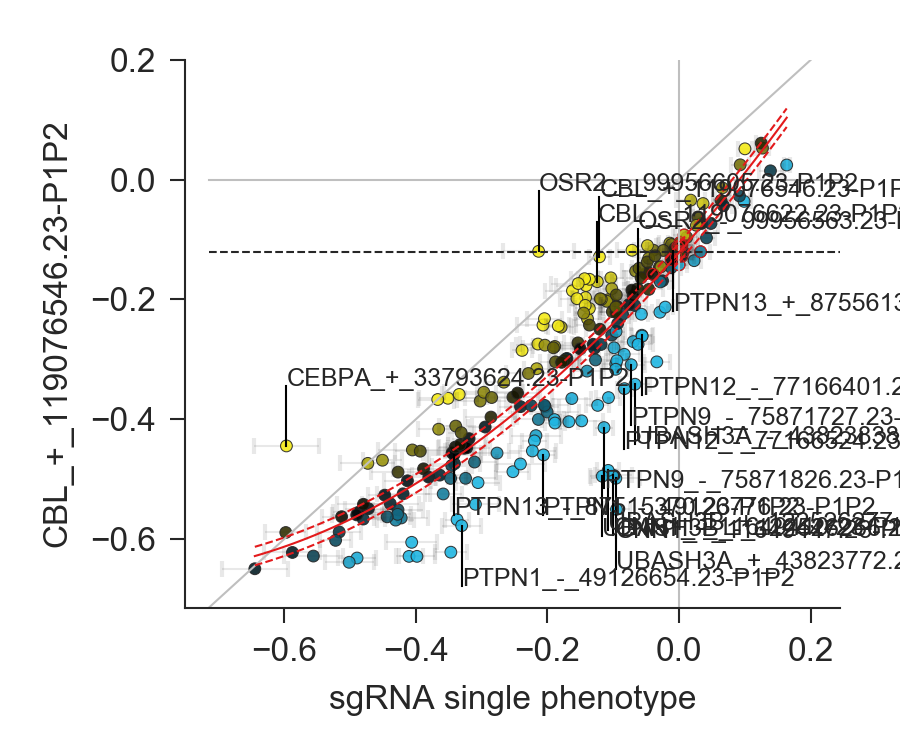

In [391]:
Image(saveFigures(plotSingleVsDouble_abba_cbl('CBL_+_119076546.23-P1P2', phenotypeMatrix_abba, singlePhenotypes_abba, emap_sgRNA_wnegs, fitFunction=quadFitForceIntercept, singlesTable=singlesTable), 'Doubles_Libraries/figs_crispra/', 'single_vs_double'))

In [159]:
import sklearn
sklearn.__version__

'0.20.2'

In [267]:
#neg-neg pairs
negRows_repave = emap_sgRNA_wnegs.loc[singlesTable['gene'] == 'negative',singlesTable['gene'] == 'negative']

randList_repave = []
rowtups = []
for i in range(len(negRows_repave)):
    for j in range(len(negRows_repave.T)):
        if j > i:
            for k in range(len(negRows_repave)):
                for l in range(len(negRows_repave.T)):
                    if l > k and k > j:
                        randList_repave.append(np.mean(np.hstack(negRows_repave.iloc[[i,j], [k,l]].values)))
                        rowtups.append((i,j,k,l))

randNegPairs_repave = pd.Series(randList_repave, index=rowtups)

In [268]:
randNegPairs_repave.head()

(0, 1, 2, 3)    0.195216
(0, 1, 2, 4)    0.124210
(0, 1, 2, 5)    0.139474
(0, 1, 2, 6)    0.086195
(0, 1, 2, 7)   -0.104763
dtype: float64

In [271]:
#gene-neg pairs
negRows_repave = emap_sgRNA_wnegs.loc[singlesTable['gene'] == 'negative']

randList_repave = []
for i in range(len(negRows_repave)):
    for j in range(len(negRows_repave)):
        if i > j:
            randList_repave.append(negRows_repave.iloc[[i,j]].groupby(singlesTable['gene'], axis=1).agg(lambda colgroup: colgroup.sum().sum() / (colgroup.shape[0] * colgroup.shape[1])).iloc[0])

randNegGIs_repave = pd.concat(randList_repave, keys=range(len(randList_repave)))

In [272]:
len(randNegGIs_repave)

11865

In [171]:
print min(upperTriangle(emap_gene)), np.percentile(upperTriangle(emap_gene), 5), np.percentile(upperTriangle(emap_gene), 50), np.percentile(upperTriangle(emap_gene), 95), max(upperTriangle(emap_gene))

-17.9874313601 -3.5127419213727036 0.1012602394390113 3.3260586990498227 11.5583719969


Doubles_Libraries/figs_crispra/png/600fig_GI_hist.png


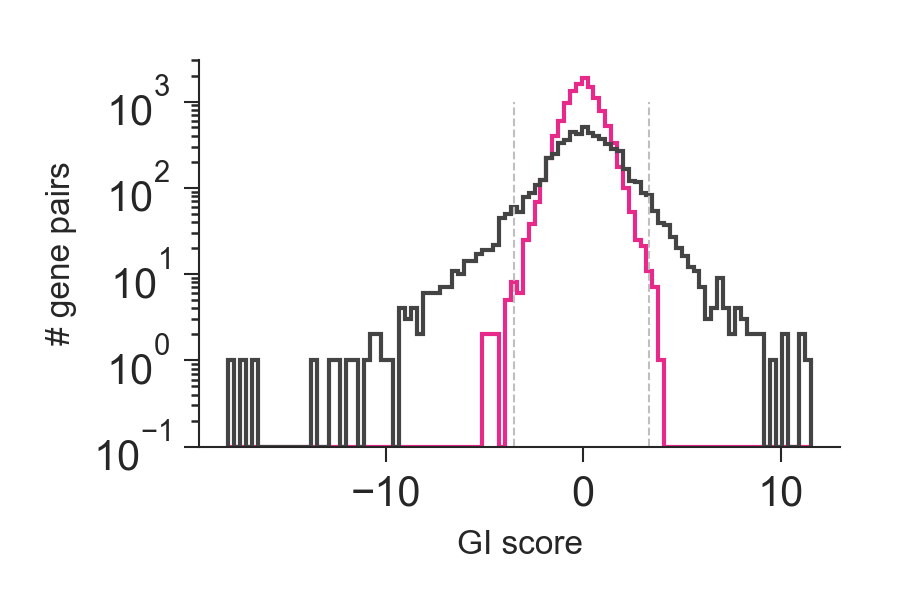

In [275]:
fig, axis = plt.subplots(figsize=(3,2))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

binrange = np.linspace(min(upperTriangle(emap_gene)), max(upperTriangle(emap_gene)), 100)

axis.hist([upperTriangle(emap_gene), randNegGIs_repave], bins=binrange, log=True, normed=False, histtype='step', lw=1, color=['#444444',dark2_all[3]])

# axis.hist(upperTriangle(emap_gene), bins=binrange, log=True, histtype='step', lw=1, color='#444444')
# axis.hist(randNegPairs_repave, bins=binrange, log=True, histtype='step', lw=1, color='r')
# axis.hist(randNegGIs_repave, bins=binrange, log=True, histtype='step', lw=1, color=dark2_all[3])

axis.plot((np.percentile(upperTriangle(emap_gene), 5),np.percentile(upperTriangle(emap_gene), 5)), (0,1000), '--', color='#BFBFBF', lw=.5)
axis.plot((np.percentile(upperTriangle(emap_gene), 95),np.percentile(upperTriangle(emap_gene), 95)), (0,1000), '--', color='#BFBFBF', lw=.5)

axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('# gene pairs', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'GI_hist'))

Doubles_Libraries/figs_crispra/png/603fig_GI_hist.png


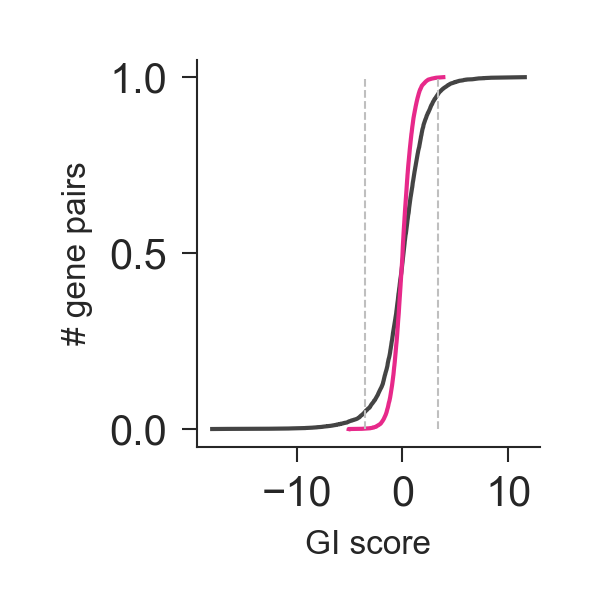

In [280]:
fig, axis = plt.subplots(figsize=(2,2))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

# binrange = np.linspace(min(upperTriangle(emap_gene)), max(upperTriangle(emap_gene)), 100)

axis.plot(upperTriangle(emap_gene).sort_values(), upperTriangle(emap_gene).sort_values().rank() / len(upperTriangle(emap_gene)), lw=1, color='#444444')

axis.plot(randNegGIs_repave.sort_values(), randNegGIs_repave.sort_values().rank() / len(randNegGIs_repave), lw=1, color=dark2_all[3])

axis.plot((np.percentile(upperTriangle(emap_gene), 5),np.percentile(upperTriangle(emap_gene), 5)), (0,1), '--', color='#BFBFBF', lw=.5)
axis.plot((np.percentile(upperTriangle(emap_gene), 95),np.percentile(upperTriangle(emap_gene), 95)), (0,1), '--', color='#BFBFBF', lw=.5)

axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('# gene pairs', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'GI_hist'))

In [281]:
emap_col = upperTriangle(emap_gene)
ssl_fdr = []
for thresh in np.linspace(-5,0,100):
    ssl_fdr.append((sum(randNegGIs_repave <= thresh)*1.0/len(randNegGIs_repave) )/ (sum(emap_col <= thresh)*1.0/len(emap_col)))
        
buf_fdr = []
for thresh in np.linspace(5,0,100):
    buf_fdr.append((sum(randNegGIs_repave >= thresh)*1.0/len(randNegGIs_repave)) / (sum(emap_col >= thresh)*1.0/len(emap_col)))
        
for thresh, fdr in zip(np.linspace(-5,0,100), ssl_fdr):
    if fdr >= 0.05:
        print thresh
        break
        
for thresh, fdr in zip(np.linspace(5,0,100), buf_fdr):
    if fdr >= 0.05:
        print thresh
        break

-2.7777777777777777
2.8282828282828283


Doubles_Libraries/figs_crispra/png/606fig_GI_hist.png


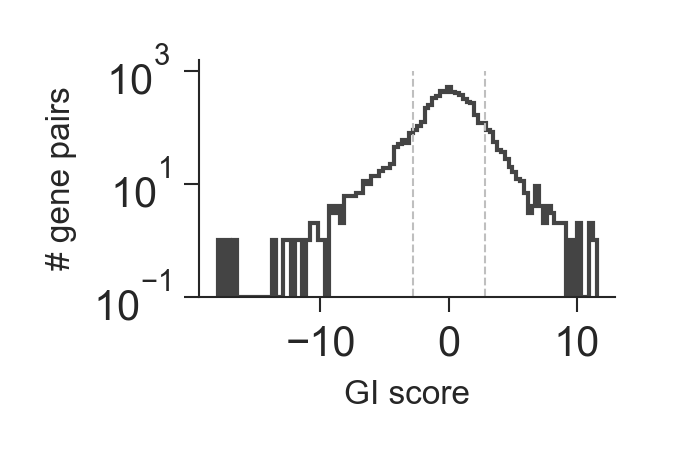

In [284]:
fig, axis = plt.subplots(figsize=(2.25,1.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

binrange = np.linspace(min(upperTriangle(emap_gene)), max(upperTriangle(emap_gene)), 100)

# axis.hist([upperTriangle(emap_gene), randNegGIs_repave], bins=binrange, log=True, normed=False, histtype='step', lw=1, color=['#444444',dark2_all[3]])

axis.hist(upperTriangle(emap_gene), bins=binrange, log=True, histtype='step', lw=1, color='#444444')
# axis.hist(randNegPairs_repave, bins=binrange, log=True, histtype='step', lw=1, color='r')
# axis.hist(randNegGIs_repave, bins=binrange, log=True, histtype='step', lw=1, color=dark2_all[3])

axis.plot((-2.777,-2.777), (0,1000), '--', color='#BFBFBF', lw=.5)
axis.plot((2.828,2.828), (0,1000), '--', color='#BFBFBF', lw=.5)

axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('# gene pairs', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'GI_hist'))

In [183]:
stats.kstest(upperTriangle(emap_gene), 'norm')

KstestResult(statistic=0.1454946150609282, pvalue=1.018958044396874e-114)

In [185]:
len(doublesTable)

57121

In [189]:
np.triu(np.ones((len(set(doublesTable['name_a'])),len(set(doublesTable['name_a'])))), k=0)

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [190]:
np.sum(_189)

28680.0

In [294]:
emap_perturb_combined = emap_gene

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

IPR002070:Transcription factor, Brachyury (-8.734882) 
	was folded up into
GO:0060021~palate development (-8.781402)

GO:0000981~RNA polymerase II transcription factor activity, sequence-specific DNA binding (-7.905933) 
	was folded up into
IPR018122:Transcription factor, fork head, conserved site (-15.641803)



In [295]:
david_matrix.head()

PIRSF005879:CCAAT/enhancer-binding protein  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   PIRSF002629:POU domain class 3 transcription factor, brain type  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   PIRSF038172:mitogen-activated protein kinase kinase kinase kinase  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   IPR013638:Fork-head N-terminal  IPR011993:Pleckstrin homology-like domain  \
0                             0.0                                        0.0   
1                             0.0                                        0.0   
2                             0.0                                        0.0   
3                             0.0                                        0.0   
4                             0.0                                        0.0   

   IPR000504:RNA recognition motif domain  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   IPR003175:Cyclin-dependent kinase inhibitor  IPR013289:Eight-Twenty-One  \
0                                          0.0                         0.0   
1                                          0.0                         0.0   
2                                          0.0                         0.0   
3                                          0.0                         0.0   
4                                          0.0                         0.0   

   IPR002070:Transcription factor, Brachyury  IPR001356:Homeodomain  ...  \
0                                        0.0                    0.0  ...   
1                                        0.0                    0.0  ...   
2                                        0.0                    0.0  ...   
3                                        0.0                    0.0  ...   
4                                        0.0                    0.0  ...   

   h_gleevecPathway:Inhibition of Cellular Proliferation by Gleevec  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   h_cellcyclePathway:Cyclins and Cell Cycle Regulation  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   h_fmlpPathway:fMLP induced chemokine gene expression in HMC-1 cells  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                       

In [296]:
david_matrix.sum().min()

2.0

In [299]:
leafid_to_gene = leaf_order.reset_index().set_index('leaf_id')['index']
leafid_to_gene.head()

leaf_id
39      FOXO4
3        ATL1
100    TGFBR2
49     IGDCC3
80       PRTG
Name: index, dtype: object

In [300]:
go_cooccurence = pd.DataFrame(np.zeros((len(emap_gene), len(emap_gene))), index=emap_gene.index, columns=emap_gene.columns)

for goterm, col in david_matrix.iteritems():
    genesInCol = col.loc[col == 1]
    
    for i, (geneid1, val1) in enumerate(genesInCol.iteritems()):
        for j, (geneid2, val2) in enumerate(genesInCol.iteritems()):
            if i >= j:
                go_cooccurence.loc[leafid_to_gene.loc[geneid1], leafid_to_gene.loc[geneid2]] += 1
                go_cooccurence.loc[leafid_to_gene.loc[geneid2], leafid_to_gene.loc[geneid1]] += 1
                
go_cooccurence.iloc[:5,:5]

AHR  ARID1A  ARRDC3  ATL1  BAK1
AHR     58.0     7.0     1.0   1.0   2.0
ARID1A   7.0    32.0     1.0   1.0   1.0
ARRDC3   1.0     1.0    12.0   1.0   1.0
ATL1     1.0     1.0     1.0  22.0   4.0
BAK1     2.0     1.0     1.0   4.0  82.0

In [301]:
go_cooccurence.loc['BAK1','BCL2L11']

15.0

In [302]:
def calcPR(scoreList, truePos, trueNeg, ascending=True):
    truePos = truePos.intersection(scoreList.index)
    trueNeg = trueNeg.intersection(scoreList.index)
    
    cumulativeTup = [(0,1,np.nan)]
    cumulativeTP = 0.0
    cumulativeFP = 0.0
    
    tup_cross95 = None
    
    for gene, score in scoreList.sort_values(inplace=False, ascending=ascending).iteritems():
        if gene in truePos or gene in trueNeg:
            if gene in truePos:
                cumulativeTP += 1

            elif gene in trueNeg:
                cumulativeFP += 1

            cumulativeTup.append((cumulativeTP / len(truePos), cumulativeTP / (cumulativeTP + cumulativeFP), score))

            if len(cumulativeTup) >= 2 and cumulativeTup[-1][1] < 0.95 and cumulativeTup[-2][1] >= 0.95:
                tup_cross95 = cumulativeTup[-2]
                print tup_cross95
                
    return cumulativeTup, tup_cross95

In [332]:
mclist = []
truenegatives = []
truepositives = []
for (gene1, gene2), num_co  in upperTriangle(go_cooccurence).iteritems():
    max_cooccurences = min([go_cooccurence.loc[gene1,gene1], go_cooccurence.loc[gene2,gene2]])
    
    if max_cooccurences >= 10 and num_co == 0:
        truenegatives.append((gene1, gene2, True))
    else:
        truenegatives.append((gene1, gene2, False))
        
    if max_cooccurences >= 10 and num_co >= 0.25*max_cooccurences:
        truepositives.append((gene1, gene2, True))
    else:
        truepositives.append((gene1, gene2, False))
    
truenegatives = pd.DataFrame(truenegatives).set_index([0,1])[2]
truepositives = pd.DataFrame(truepositives).set_index([0,1])[2]

In [333]:
truepositives.sum(), truenegatives.sum()

(260, 924)

In [334]:
corrPR = calcPR(upperTriangle(emap_gene_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

(0.038461538461538464, 1.0, 0.6917874541067532)
(0.0038461538461538464, 1.0, 12.588007595083694)
(0, 1, nan)
(0.013245033112582781, 1.0, -10.677762081464182)


Doubles_Libraries/figs_crispra/png/624fig_precision_recall.png


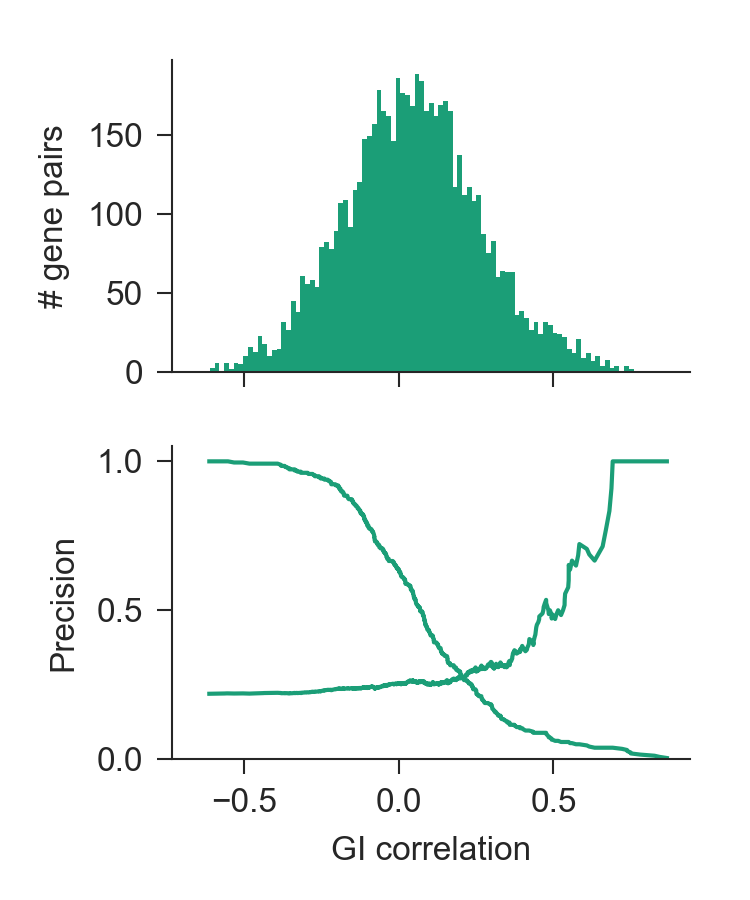

In [349]:
fig, axes = plt.subplots(2,1, figsize=(2.5,3), sharex=True)

axis = axes[0]
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

binrange = np.linspace(min(upperTriangle(emap_gene_corr)), max(upperTriangle(emap_gene_corr)), 100)

axis.hist(upperTriangle(emap_gene_corr), bins=binrange, histtype='stepfilled')

axis.set_ylabel('# gene pairs', fontsize=8)

axis = axes[1]
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

axis.plot(zip(*corrPR)[2], zip(*corrPR)[1], lw=1, c=dark2_all[0])
axis.plot(zip(*corrPR)[2], zip(*corrPR)[0], lw=1, c=dark2_all[0])

axis.set_xlabel('GI correlation', fontsize=8)

axis.set_ylim((0,1.05))
axis.set_ylabel('Precision', fontsize=8)

plt.tight_layout()
Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/', 'precision_recall'))

Doubles_Libraries/figs_crispra/png/617fig_false_positive_rate.png


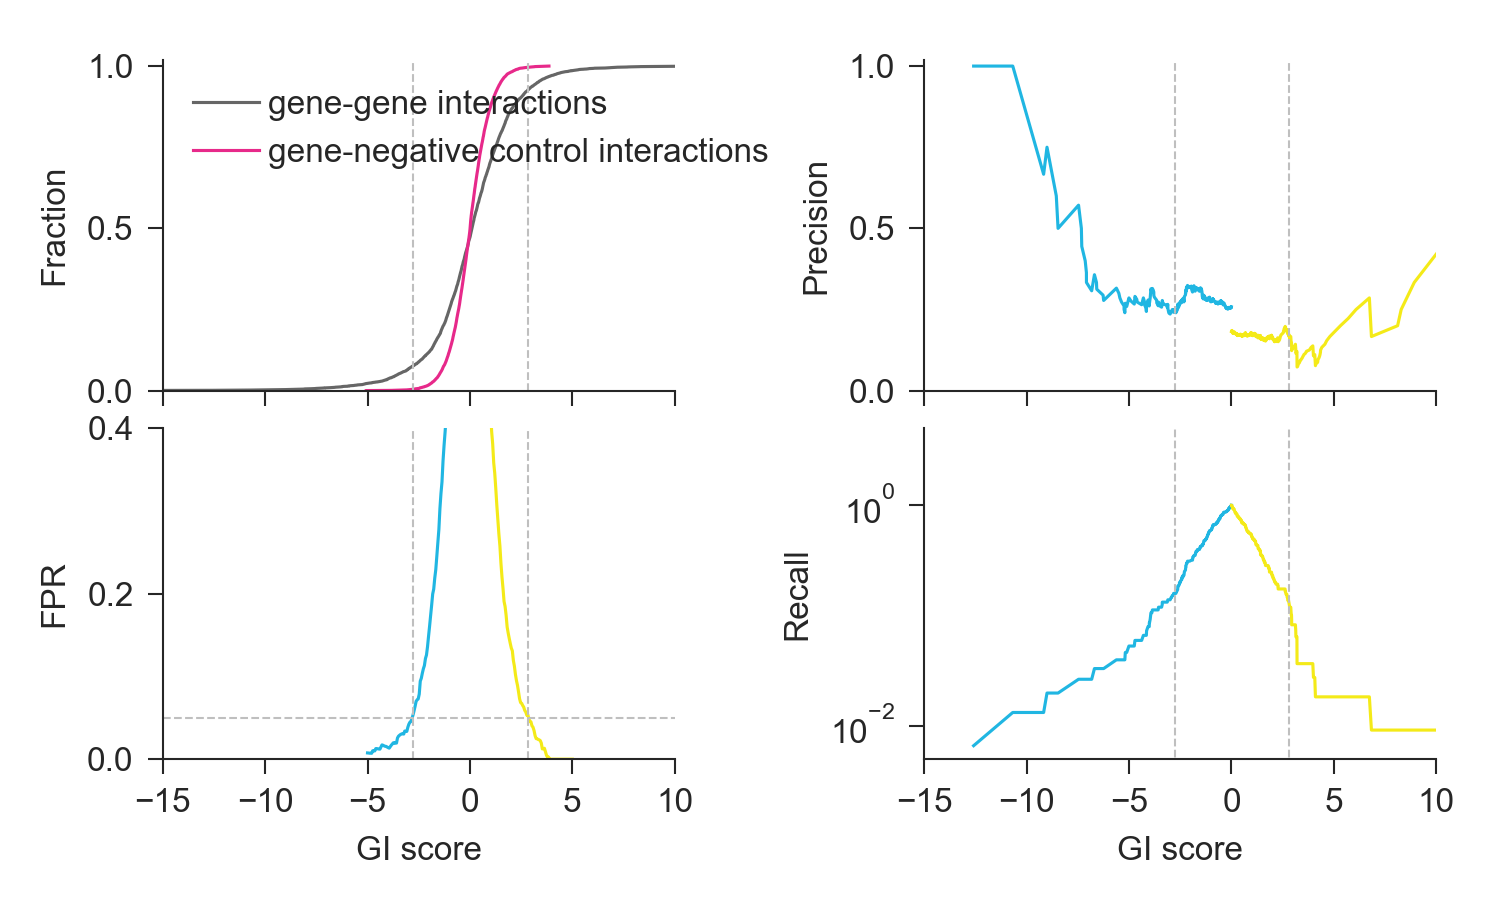

In [338]:
negative_fdr = -2.7777777777777777
positive_fdr = 2.8282828282828283
fig, axes = plt.subplots(2,2, figsize=(5,3))

axis = axes[0,0]
axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

plotbins = np.linspace(-15,10,200)
# axis.hist(upperTriangle(emap_gene), bins=plotbins, color='#666666', histtype='stepfilled', log=True, label='gene-gene interactions')
# axis.hist(randNegGIs_repave, bins=plotbins, color=dark2_all[3], lw=1, label='gene-negative control interactions')

axis.plot(upperTriangle(emap_gene).sort_values(), upperTriangle(emap_gene).sort_values().rank()*1.0/len(upperTriangle(emap_gene)), color='#666666', lw=.75, label='gene-gene interactions')
axis.plot(randNegGIs_repave.sort_values(), randNegGIs_repave.sort_values().rank()*1.0/len(randNegGIs_repave), color=dark2_all[3], lw=.75, label='gene-negative control interactions')

axis.plot((negative_fdr,negative_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')
axis.plot((positive_fdr,positive_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')

# axis.plot((-3,-3),(0,1.02), '--', lw=.5, color='#BFBFBF')
# axis.plot((3,3),(0,1.02), '--', lw=.5, color='#BFBFBF')

axis.set_ylim((0,1.02))
axis.set_xlim((-15,10))

axis.set_xticklabels([])
axis.set_yticks((0,.5,1))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)

axis.set_ylabel('Fraction', fontsize=8)

axis.legend(loc='upper left', fontsize=8)

axis = axes[1,0]
axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.plot(np.linspace(-5,0,100), ssl_fdr, color = '#20B6E2', lw=0.75)

axis.plot(np.linspace(5,0,100), buf_fdr, color = '#F4EA18', lw=0.75)

axis.plot((-15,10),(0.05,0.05), '--', lw=.5, color='#BFBFBF')
axis.plot((negative_fdr,negative_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')
axis.plot((positive_fdr,positive_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')

# axis.plot((-3,-3),(0,1.02), '--', lw=.5, color='#BFBFBF')
# axis.plot((3,3),(0,1.02), '--', lw=.5, color='#BFBFBF')

axis.set_ylim((0,0.4))
axis.set_xlim((-15,10))

# axis.set_xticklabels([])
axis.set_yticks((0,.2,.4))

axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('FPR', fontsize=8)

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)

axis = axes[0,1]
axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.plot(zip(*synGIPR)[2], zip(*synGIPR)[1], color = '#20B6E2', lw=0.75)

axis.plot(zip(*buffGIPR)[2], zip(*buffGIPR)[1], color = '#F4EA18', lw=0.75)

# axis.plot((-15,10),(0.05,0.05), '--', lw=.5, color='#BFBFBF')
axis.plot((negative_fdr,negative_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')
axis.plot((positive_fdr,positive_fdr),(0,1.02), '--', lw=.5, color='#BFBFBF')

# axis.plot((-3,-3),(0,1.02), '--', lw=.5, color='#BFBFBF')
# axis.plot((3,3),(0,1.02), '--', lw=.5, color='#BFBFBF')

axis.set_ylim((0,1.02))
axis.set_xlim((-15,10))

axis.set_xticklabels([])
axis.set_yticks((0,.5,1))

# axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('Precision', fontsize=8)

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)


axis = axes[1,1]
axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.semilogy()

axis.plot(zip(*synGIPR)[2], zip(*synGIPR)[0], color = '#20B6E2', lw=0.75)

axis.plot(zip(*buffGIPR)[2], zip(*buffGIPR)[0], color = '#F4EA18', lw=0.75)

# axis.plot((-15,10),(0.05,0.05), '--', lw=.5, color='#BFBFBF')
axis.plot((negative_fdr,negative_fdr),(5e-5, 5), '--', lw=.5, color='#BFBFBF')
axis.plot((positive_fdr,positive_fdr),(5e-5, 5), '--', lw=.5, color='#BFBFBF')

# axis.plot((-3,-3),(5e-5, 5), '--', lw=.5, color='#BFBFBF')
# axis.plot((3,3),(5e-5, 5), '--', lw=.5, color='#BFBFBF')

axis.set_ylim((5e-3, 5))
axis.set_xlim((-15,10))

axis.set_yticks((1e-2, 1e-1, 1))

axis.set_xlabel('GI score', fontsize=8)
axis.set_ylabel('Recall', fontsize=8)

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)
axis.minorticks_off()

plt.tight_layout(h_pad=0.2)
Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/','false_positive_rate'))

## Supplementary tables

In [196]:
!mkdir Doubles_Libraries/CRISPRa_final_analysis/supp_tables

In [193]:
crispraTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_guides.txt',sep='\t', index_col=0)
crispraTable.head()

id                       sgId        sgRNA sequence  upstream barcode  \
0  1581     AHR_-_17338168.23-P1P2  GGGAATGGAATCCAGATGGG  ATACAACCAGTTTTTC   
1  1582     AHR_-_17338164.23-P1P2  GAGACGGAATGGAATCCAGA  GTGTGGACACAGGAAT   
2  1583  ARID1A_+_27022167.23-P1P2  GCCGCCTGGCAAACCCGGAG  ACAAATAAACTCCAGA   
3  1584  ARID1A_-_27022243.23-P1P2  GGCCTCGTGTCGGAGTGAGG  GATCCCCAGCCATTCT   
4  1585  ARRDC3_-_90679309.23-P1P2  GGTACAGTAGGTGTAGAGCT  ATAGTTAAACGCTAAT   

  downstream barcode  
0   AGGAGCGCCTAGTGGG  
1   TGGTCGCTAGAGGGAT  
2   GAAATACGGCAATTCT  
3   AATAGCCTTCACTACT  
4   CGTAGGAGAGGCTAAT

In [194]:
crispraTable['gene'] = crispraTable['sgId'].apply(lambda sgid: sgid.split('_')[0])

In [198]:
crispraTable.rename({'sgId':'sgID'}, axis=1).loc[:, ['sgID','gene','sgRNA sequence', 'upstream barcode', 'downstream barcode']].to_csv('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_sgRNA_info.txt',sep='\t')

In [203]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)
sgRNA_reads_phen = pd.concat((summedCountsTable, log2es_rep1, log2es_rep2, (log2es_rep1+log2es_rep2)/2), axis=1, sort=True)
sgRNA_reads_phen.columns = pd.MultiIndex.from_tuples([
    ('barcode sequencing','endpoint','Rep1'),
    ('barcode sequencing','endpoint','Rep2'),
    ('barcode sequencing','T0','Rep1'),
    ('barcode sequencing','T0','Rep2'),
    ('sgRNA sequencing','endpoint','Rep1'),
    ('sgRNA sequencing','endpoint','Rep2'),
    ('sgRNA sequencing','T0','Rep1'),
    ('sgRNA sequencing','T0','Rep2'),
    ('triple sequencing','endpoint','Rep1'),
    ('triple sequencing','endpoint','Rep2'),
    ('triple sequencing','T0','Rep1'),
    ('triple sequencing','T0','Rep2'),
    ('triple sequencing','phenotype','Rep1'),
    ('triple sequencing','phenotype','Rep2'),
    ('triple sequencing','phenotype','Replicate average')  
])
sgRNA_reads_phen.head()

barcode sequencing         \
                                                            endpoint          
                                                                Rep1   Rep2   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                  90.0   42.0   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                 230.0  164.0   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2               88.0  120.0   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2               57.0   40.0   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2              135.0  107.0   

                                                                 \
                                                      T0          
                                                    Rep1   Rep2   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2     367.0  433.0   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2     598.0  619.0   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2  430.0  581.0   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2  445.0  467.0   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2  386.0  495.0   

                                                  sgRNA sequencing         \
                                                          endpoint          
                                                              Rep1   Rep2   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                56.0   29.0   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2               293.0  167.0   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2             64.0  109.0   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2             27.0   46.0   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2            147.0  140.0   

                                                                 \
                                                      T0          
                                                    Rep1   Rep2   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2     372.0  487.0   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2     804.0  846.0   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2  481.0  683.0   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2  617.0  606.0   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2  495.0  733.0   

                                                  triple sequencing        \
                                                           endpoint         
                                                               Rep1  Rep2   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                 37.0  21.0   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                215.0  87.0   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2              48.0  60.0   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2              14.0  37.0   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2              96.0  62.0   

                                                                           \
                                                      T0        phenotype   
                                                    Rep1   Rep2      Rep1   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2     229.0  305.0 -0.470701   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2     524.0  519.0 -0.334627   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2  300.0  420.0 -0.479597   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2  358.0  357.0 -0.667792   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2  315.0  397.0 -0.380357   

                                                                               
                                                                               
                                                       Rep2 Replicate average  
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2    -0.532444         -0.501573  
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2    -0.424563         -0.379595  
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2 -0.445195         -0.462396  
AHR_-_173381

In [204]:
sgRNA_reads_phen.to_csv('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_sgRNA_reads_phenotypes.txt',sep='\t')

In [207]:
sgRNA_gi_corr = pd.concat((upperTriangle(emap_quad_std_rep1, k=0), upperTriangle(emap_quad_std_rep2, k=0), upperTriangle(emap_sgRNA_wnegs, k=0),
                          upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep1, diagNull=False), k=0), upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep2, diagNull=False), k=0), upperTriangle(calculateCorrelationMatrix(emap_sgRNA_wnegs, diagNull=False), k=0)), axis=1)
sgRNA_gi_corr.columns = pd.MultiIndex.from_tuples([
    ('GI score', 'Rep1'),
    ('GI score', 'Rep2'),
    ('GI score', 'Replicate average'),
    ('GI correlation', 'Rep1'),
    ('GI correlation', 'Rep2'),
    ('GI correlation', 'Replicate average'),
])
sgRNA_gi_corr.head()

GI score            \
                                                      Rep1      Rep2   
AHR_-_17338164.23-P1P2 AHR_-_17338164.23-P1P2     1.580932 -0.131610   
                       AHR_-_17338168.23-P1P2     3.392699  3.325947   
                       ARID1A_+_27022167.23-P1P2  1.631582  1.370249   
                       ARID1A_-_27022243.23-P1P2 -7.146045 -0.595725   
                       ARRDC3_+_90679525.23-P1P2  0.457425 -0.491836   

                                                                    \
                                                 Replicate average   
AHR_-_17338164.23-P1P2 AHR_-_17338164.23-P1P2             0.983857   
                       AHR_-_17338168.23-P1P2             3.679713   
                       ARID1A_+_27022167.23-P1P2          1.704452   
                       ARID1A_-_27022243.23-P1P2         -5.263355   
                       ARRDC3_+_90679525.23-P1P2          0.088265   

                                                 GI correlation            \
                                                           Rep1      Rep2   
AHR_-_17338164.23-P1P2 AHR_-_17338164.23-P1P2          1.000000  1.000000   
                       AHR_-_17338168.23-P1P2          0.569881  0.467240   
                       ARID1A_+_27022167.23-P1P2       0.073064  0.002011   
                       ARID1A_-_27022243.23-P1P2      -0.020146  0.048319   
                       ARRDC3_+_90679525.23-P1P2      -0.072433 -0.138234   

                                                                    
                                                 Replicate average  
AHR_-_17338164.23-P1P2 AHR_-_17338164.23-P1P2             1.000000  
                       AHR_-_17338168.23-P1P2             0.663562  
                       ARID1A_+_27022167.23-P1P2          0.047810  
                       ARID1A_-_27022243.23-P1P2          0.019113  
                       ARRDC3_+_90679525.23-P1P2         -0.169274

In [249]:
sgRNA_gi_corr.to_csv('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_sgRNA_GIs_correlations.txt',sep='\t')

In [209]:
gene_gi_corr = pd.concat((upperTriangle(emap_gene_rep1, k=0), upperTriangle(emap_gene_rep2, k=0), upperTriangle(emap_gene, k=0),
                          upperTriangle(calculateCorrelationMatrix(emap_gene_rep1, diagNull=False), k=0), upperTriangle(calculateCorrelationMatrix(emap_gene_rep2, diagNull=False), k=0), upperTriangle(calculateCorrelationMatrix(emap_gene, diagNull=False), k=0)), axis=1)
gene_gi_corr.columns = pd.MultiIndex.from_tuples([
    ('GI score', 'Rep1'),
    ('GI score', 'Rep2'),
    ('GI score', 'Replicate average'),
    ('GI correlation', 'Rep1'),
    ('GI correlation', 'Rep2'),
    ('GI correlation', 'Replicate average'),
])
gene_gi_corr.head()

/home/mhorlbeck/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mhorlbeck/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


GI score                             GI correlation            \
                Rep1      Rep2 Replicate average           Rep1      Rep2   
AHR AHR     3.211674  2.678628          3.251447       1.000000  1.000000   
    ARID1A -2.755540  0.261189         -1.764937       0.099887  0.157149   
    ARRDC3  0.098585  1.205497          0.750670      -0.133318 -0.216960   
    ATL1    0.249680 -0.824146         -0.237766      -0.308765 -0.331295   
    BAK1   -0.749653  0.063981         -0.470196      -0.015732 -0.065439   

                              
           Replicate average  
AHR AHR             1.000000  
    ARID1A          0.131742  
    ARRDC3         -0.228654  
    ATL1           -0.340564  
    BAK1           -0.089306

In [248]:
gene_gi_corr.to_csv('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_gene_GIs_correlations.txt',sep='\t')

In [211]:
emap_perturb_combined = emap_gene

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

IPR002070:Transcription factor, Brachyury (-8.734882) 
	was folded up into
GO:0060021~palate development (-8.781402)

GO:0000981~RNA polymerase II transcription factor activity, sequence-specific DNA binding (-7.905933) 
	was folded up into
IPR018122:Transcription factor, fork head, conserved site (-15.641803)



In [218]:
eligible_parent_nodes['short name'] = ['MAP2K',
 'N-terminal Forkhead TF',
 np.nan,
 'ETS2/MAPK1',
 'Ig domain containing',
 np.nan,
 'Histidine phosphatase',
 'Tyrosine phosphatase',
 'Forkhead TF',
 'Centriole',
 'DNA binding',
 'MAP4K',
 'LIM-type zinc finger TF',
 'Brachyury TF',
 'Kinesin',
 'BAK/BIM',
 'bLZ TF',
 'Response to peptide hormone',
 'CDK inhibitor',
 'Blood coagulation']

In [235]:
with open('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_cluster_annotations_GI.txt','w') as outfile:
    outfile.write('#Cluster ID\tCluster label\n#Member genes\n#Enriched GO terms\tlog p-value\n')
    for n in sorted(list(set(node_to_parent_dict.values()))):
        if n != 'top':
            outfile.write(str(n) + '\t' + eligible_parent_nodes.loc[n,'short name'] + '\n' + 
                      ', '.join(node_to_parent_table.loc[emap_perturb_combined.index].loc[node_to_parent_table.apply(lambda row: n in row.values, axis=1)].index) + '\n' + 
                      repr(node_enrichment_table.loc[n, node_enrichment_table.loc[n] <= -7.5].dropna().sort_values()) + '\n')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error
  This is separate from the ipykernel package so we can avoid doing imports until


In [236]:
!head Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_cluster_annotations_GI.txt

#Cluster ID	Cluster label
#Member genes
#Enriched GO terms	log p-value
112.0	MAP2K
MAP2K3, MAP2K6
GO:0035897~proteolysis in other organism                              -8.734882
GO:0004708~MAP kinase kinase activity                                 -8.734882
hsa05014:Amyotrophic lateral sclerosis (ALS)                          -8.734882
GO:0018108~peptidyl-tyrosine phosphorylation                          -7.636270
GO:0004713~protein tyrosine kinase activity                           -7.636270


In [238]:
emap_perturb_combined = perturb_map

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

IPR013638:Fork-head N-terminal (-8.624252) 
	was folded up into
IPR018122:Transcription factor, fork head, conserved site (-11.863117)

GO:0030225~macrophage differentiation (-7.525640) 
	was folded up into
PIRSF005879:CCAAT/enhancer-binding protein (-12.170031)

PIRSF005879:CCAAT/enhancer-binding protein (-12.170031) 
	was folded up into
IPR004827:Basic-leucine zipper domain (-12.207464)



In [244]:
eligible_parent_nodes['short name'] = ['MAPK1-ETS2',
 'N-terminal Homeobox TF',
 'Ig domain containing',
 np.nan,
 np.nan,
 'negative regulation of signal transduction',
 'MAP2K',
 'RTK binding',
 np.nan,
 'Erythrocytosis',
 'Forkhead TF',
 'CDK inhibitor',
 'Tyrosine phosphatase',
 'Regulation of apoptosis',
 'bLZ TF',
 'RNA pol II TF',
 'Collagen',
 'Brachyury TF',
 'Homeobox TF',
 'Brain development']

In [245]:
eligible_parent_nodes

term       logp  \
106              hsa04320:Dorso-ventral axis formation  -8.624252   
107       IPR022067:Homeobox protein Hox1A3 N-terminal  -8.624252   
108                 IPR003598:Immunoglobulin subtype 2  -8.624252   
111                     IPR013638:Fork-head N-terminal  -8.624252   
113              GO:0030225~macrophage differentiation  -7.525640   
114  GO:0009968~negative regulation of signal trans...  -8.624252   
117           GO:0035897~proteolysis in other organism  -8.624252   
124        GO:0030971~receptor tyrosine kinase binding  -7.525640   
126         PIRSF005879:CCAAT/enhancer-binding protein -12.170031   
133  222800~Erythrocytosis due to bisphosphoglycera...  -7.525640   
136  IPR018122:Transcription factor, fork head, con... -11.863117   
137        IPR003175:Cyclin-dependent kinase inhibitor -12.170031   
141     GO:0035335~peptidyl-tyrosine dephosphorylation  -8.525892   
143         GO:0042981~regulation of apoptotic process -10.071358   
144              IPR004827:Basic-leucine zipper domain -12.207464   
163  GO:0045944~positive regulation of transcriptio...  -8.174149   
173           IPR000885:Fibrillar collagen, C-terminal  -8.624252   
180          IPR002070:Transcription factor, Brachyury  -7.525640   
185                 IPR017970:Homeobox, conserved site  -8.624362   
204                       GO:0007420~brain development  -9.867446   

                                     short name  
106                                  MAPK1-ETS2  
107                      N-terminal Homeobox TF  
108                        Ig domain containing  
111                                         NaN  
113                                         NaN  
114  negative regulation of signal transduction  
117                                       MAP2K  
124                                 RTK binding  
126                                         NaN  
133                              Erythrocytosis  
136                                 Forkhead TF  
137                               CDK inhibitor  
141                        Tyrosine phosphatase  
143                     Regulation of apoptosis  
144                                      bLZ TF  
163                               RNA pol II TF  
173                                    Collagen  
180                                Brachyury TF  
185                                 Homeobox TF  
204                           Brain development

In [246]:
with open('Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_cluster_annotations_Perturb.txt','w') as outfile:
    outfile.write('#Cluster ID\tCluster label\n#Member genes\n#Enriched GO terms\tlog p-value\n')
    for n in sorted(list(set(node_to_parent_dict.values()))):
        if n != 'top':
            outfile.write(str(n) + '\t' + eligible_parent_nodes.loc[n,'short name'] + '\n' + 
                      ', '.join(node_to_parent_table.loc[emap_perturb_combined.index].loc[node_to_parent_table.apply(lambda row: n in row.values, axis=1)].index) + '\n' + 
                      repr(node_enrichment_table.loc[n, node_enrichment_table.loc[n] <= -7.5].dropna().sort_values()) + '\n')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
!head Doubles_Libraries/CRISPRa_final_analysis/supp_tables/Table_SNNN_cluster_annotations_Perturb.txt

#Cluster ID	Cluster label
#Member genes
#Enriched GO terms	log p-value
106.0	MAPK1-ETS2
ETS2, MAPK1
hsa04320:Dorso-ventral axis formation   -8.624252
hsa04014:Ras signaling pathway          -7.525640
Name: 106, dtype: float64
107.0	N-terminal Homeobox TF
HOXC13, HOXA13


## Tabulating screen size

In [250]:
len(doublesTable)

57121

In [251]:
57121**.5

239.0

In [257]:
(summedCountsTable >= 15).sum()

barcode    cyc  rep1    53506
                rep2    53481
           t0   rep1    54141
                rep2    54173
sgRNA      cyc  rep1    53084
                rep2    53203
           t0   rep1    55331
                rep2    55370
tripleseq  cyc  rep1    50771
                rep2    50916
           t0   rep1    54093
                rep2    54131
dtype: int64

In [255]:
print len(log2es_rep1), len(log2es_rep1)**.5, len(log2es_rep2), len(log2es_rep2)**.5,

51984 228.0 51984 228.0


In [256]:
print len(set(log2es_rep1.index).intersection(log2es_rep2.index))

51984


In [259]:
print len(upperTriangle(phenotypeMatrix_abba, k=0))

26106


In [260]:
print len(upperTriangle(emap_gene, k=0))

6328


In [261]:
print len(emap_gene)

112
